# Лабораторная работа: "Метод главных компонентов. Метод частичных наименьших квадратов"

In [1]:
import pandas as pd
import pickle
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, 'utils'))

from utils import process_molecules

In [2]:
pca_features_min_max_scaler = pd.read_csv("data/pca_features_min_max_scaler.csv")
pca_features_standard_scaler = pd.read_csv("data/pca_features_standard_scaler.csv")

In [3]:
pca_features_min_max_scaler.head()

PC1       PC2       PC3       PC4       PC5
0 -0.514385 -0.185401 -0.022392  0.069104  0.224408
1  0.022388 -0.107485  0.526215  0.067292 -0.078642
2  0.517200 -0.006780 -0.227913 -0.234314  0.024417
3  0.227489 -0.374004 -0.018092 -0.180750 -0.200349
4  0.954773 -0.210940 -0.164147  0.222302 -0.206491

In [4]:
pca_features_standard_scaler.head()

PC1       PC2       PC3       PC4       PC5       PC6
0 -3.320530 -0.201618  0.016179 -0.301738 -1.474737  0.444998
1  0.382460 -2.445712  1.537049 -0.165540  0.617507  0.540483
2  2.534268  0.377519 -1.969012  0.476070  0.583200  0.958543
3  0.172279 -1.370953 -1.358692  0.021461  1.636582 -0.066624
4  3.838316 -1.395575 -0.670500  2.552466  0.964254 -0.052559

> Видим, что разное масштабирование влияет на количество новых сформированных компонент: MinMax - 5 компонент, StandardScaler - 6

In [5]:
with open("./data/pca_features_standard_scaler_transformer.pkl", "rb") as f:
    pca_features_standard_scaler_transformer = pickle.load(f)

with open("./data/pca_features_min_max_scaler_transformer.pkl", "rb") as f:
    pca_features_min_max_scaler_transformer = pickle.load(f)

> Посмотрим на трансформеры

In [6]:
pca_features_min_max_scaler_transformer

Pipeline(steps=[('get_descriptors',
                 FunctionTransformer(func=<function process_molecules at 0x7f2851d32700>)),
                ('scaler',
                 FunctionTransformer(func=<function scale_data at 0x7f2851d327a0>,
                                     kw_args={'title_scaler': 'MinMaxScaler'})),
                ('pca',
                 FunctionTransformer(func=<function apply_pca at 0x7f2851d328e0>,
                                     kw_args={'save_dir': 'train_plots',
                                              'title_scaler': 'MinMaxScaler'}))])

In [7]:
pca_features_standard_scaler_transformer

Pipeline(steps=[('get_descriptors',
                 FunctionTransformer(func=<function process_molecules at 0x7f2851d32700>)),
                ('scaler',
                 FunctionTransformer(func=<function scale_data at 0x7f2851d327a0>,
                                     kw_args={'title_scaler': 'StandardScaler'})),
                ('pca',
                 FunctionTransformer(func=<function apply_pca at 0x7f2851d328e0>,
                                     kw_args={'save_dir': 'train_plots',
                                              'title_scaler': 'StandardScaler'}))])

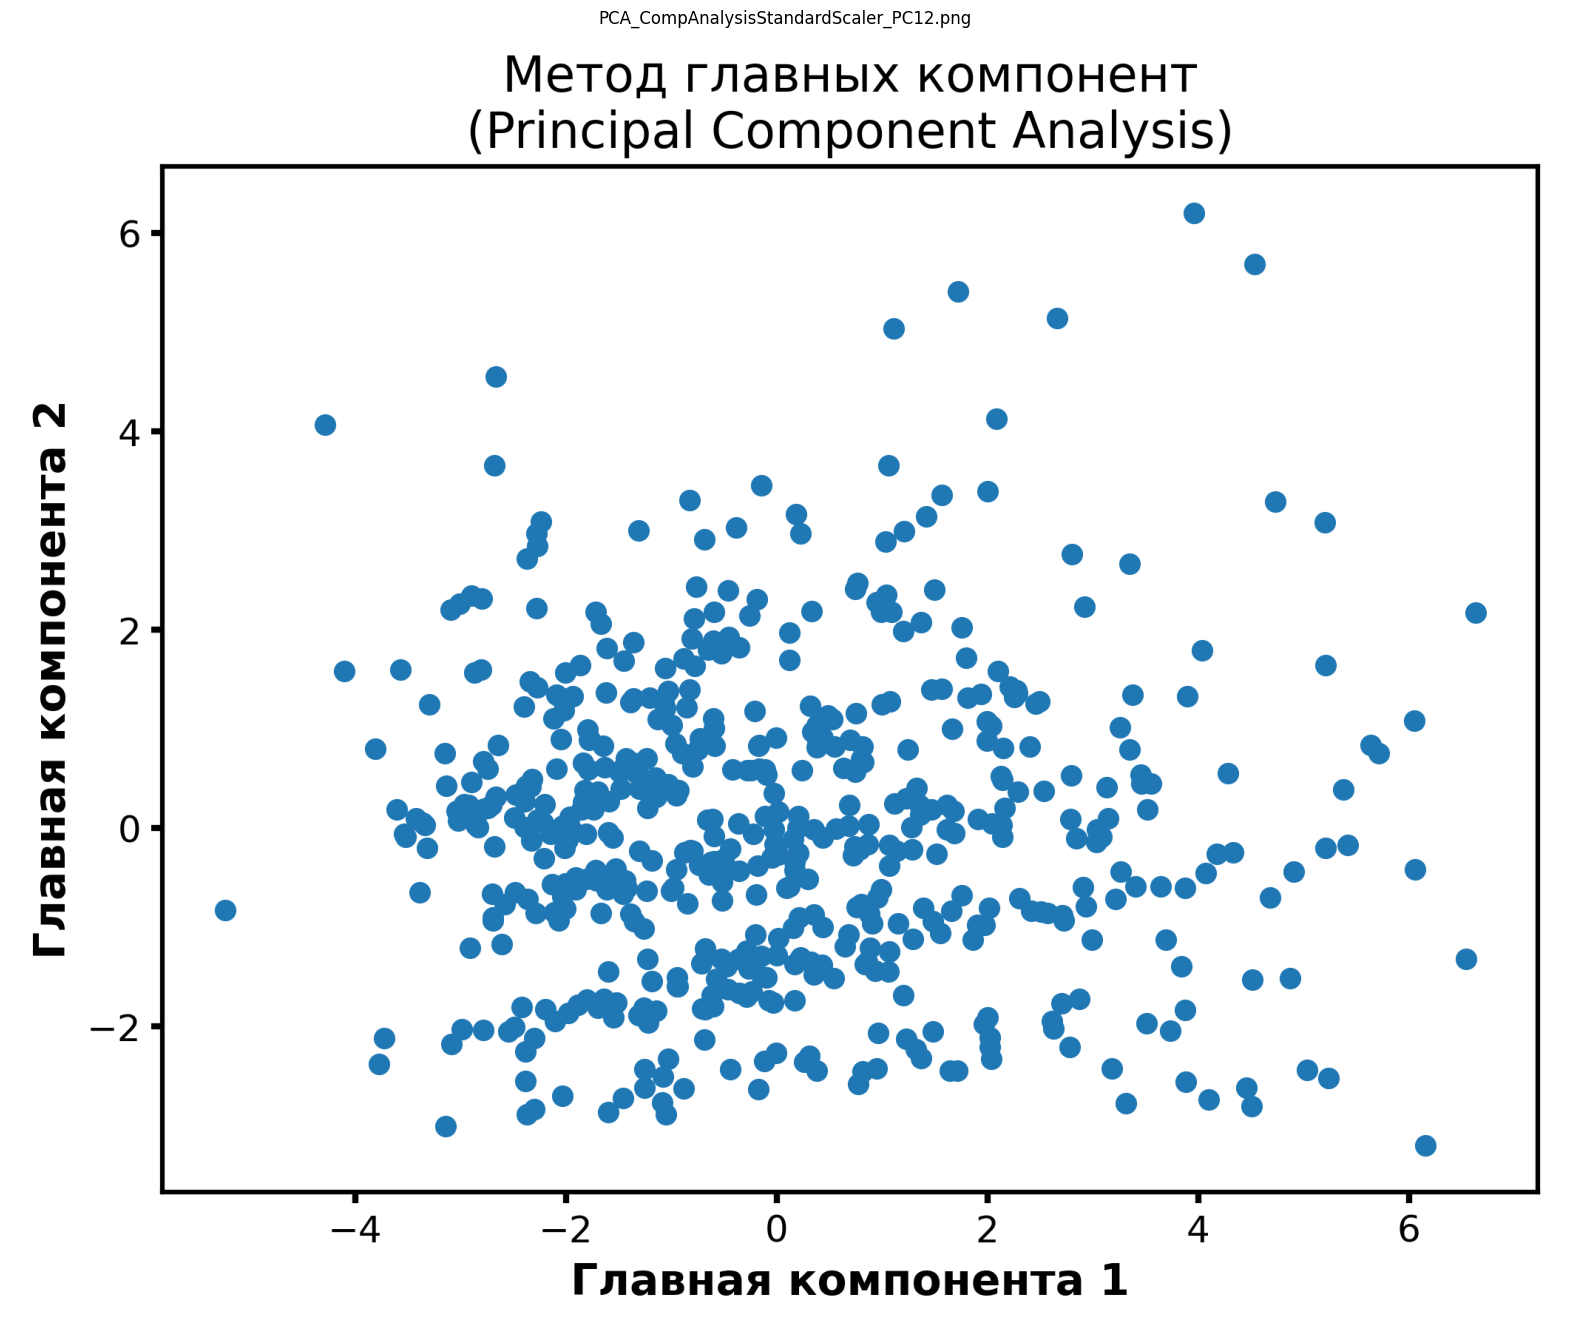

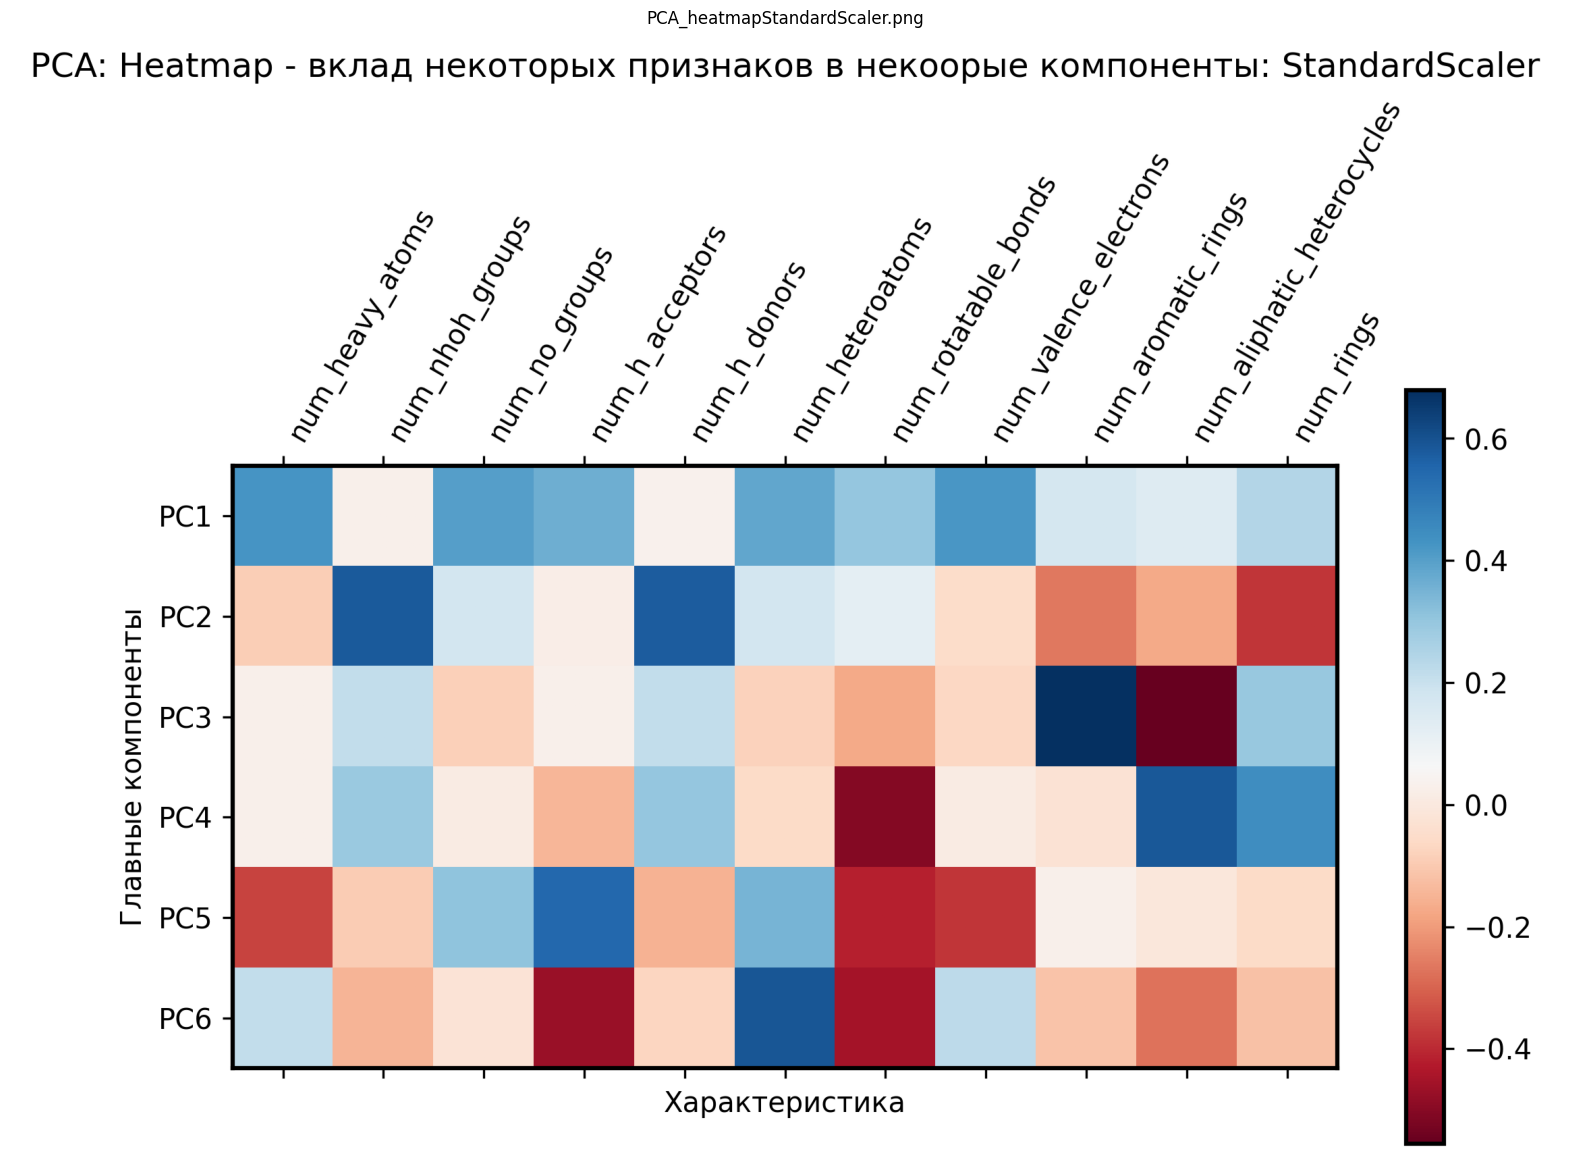

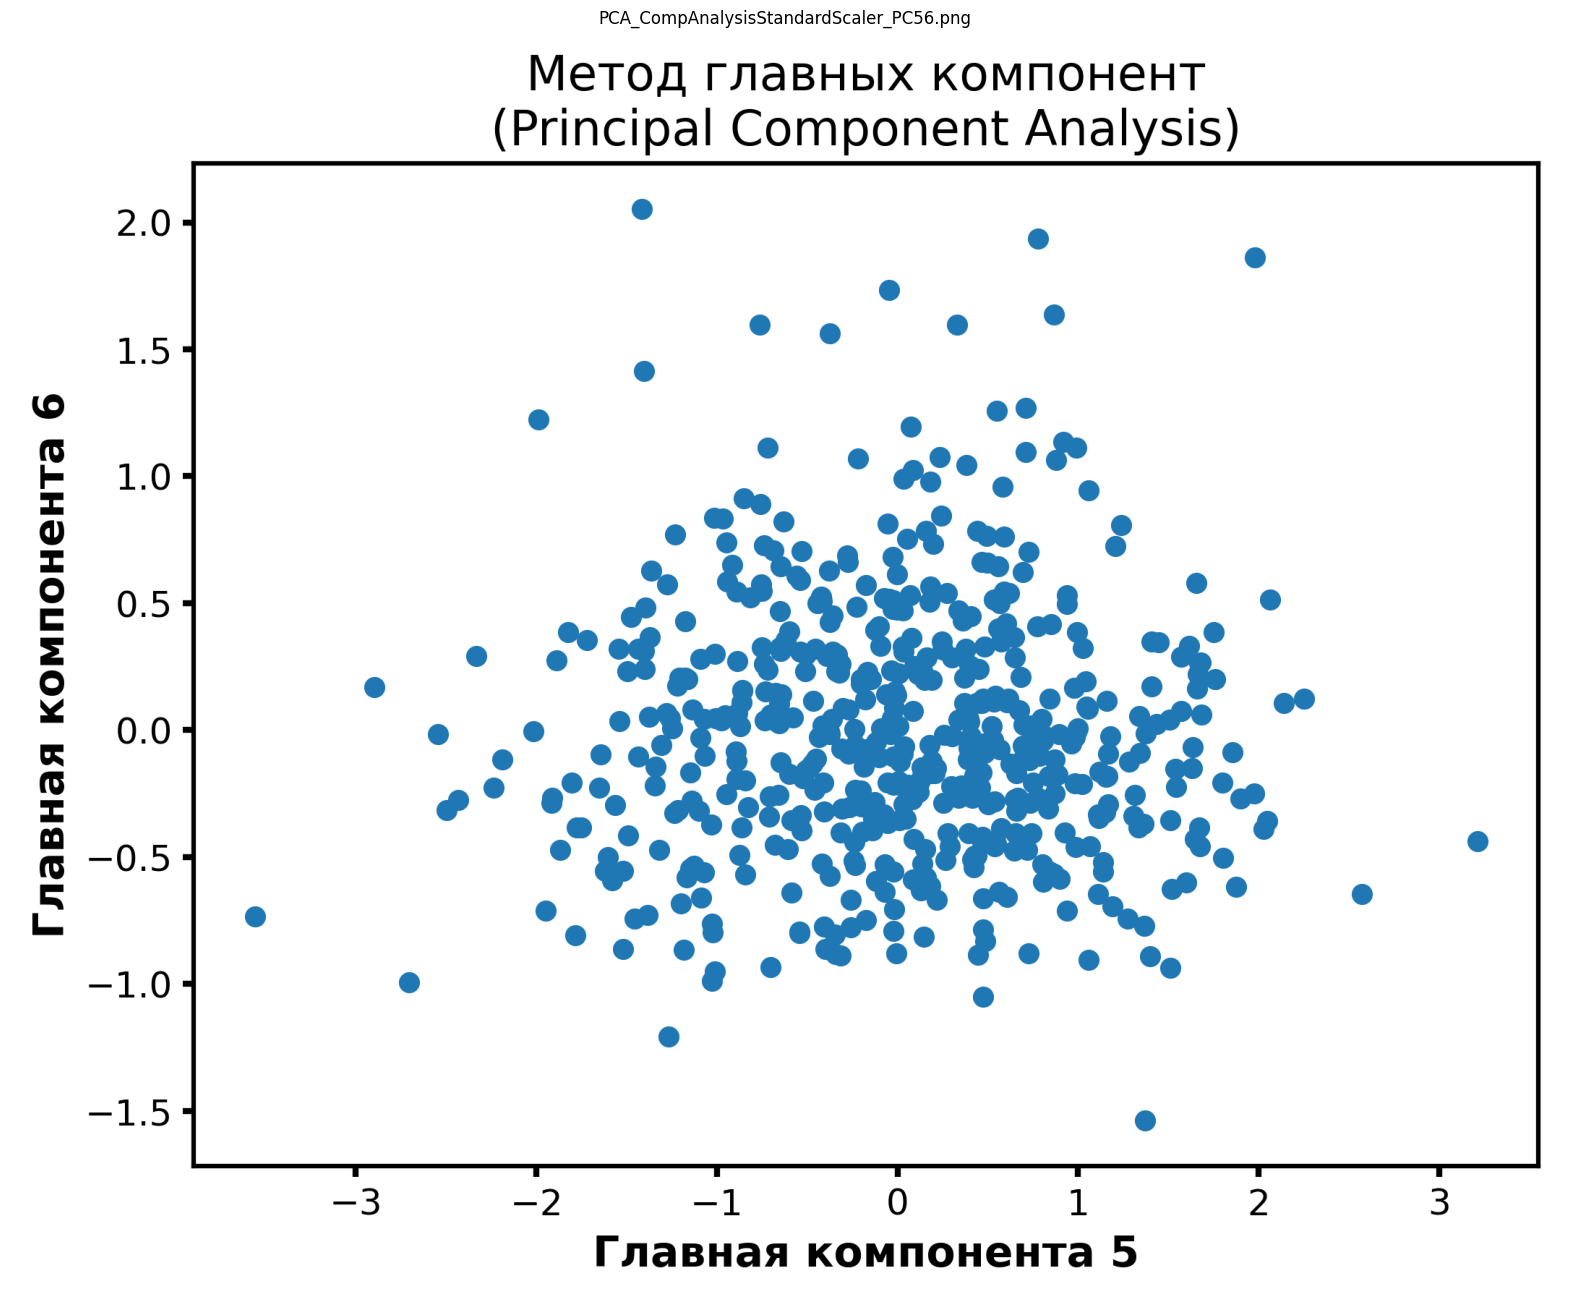

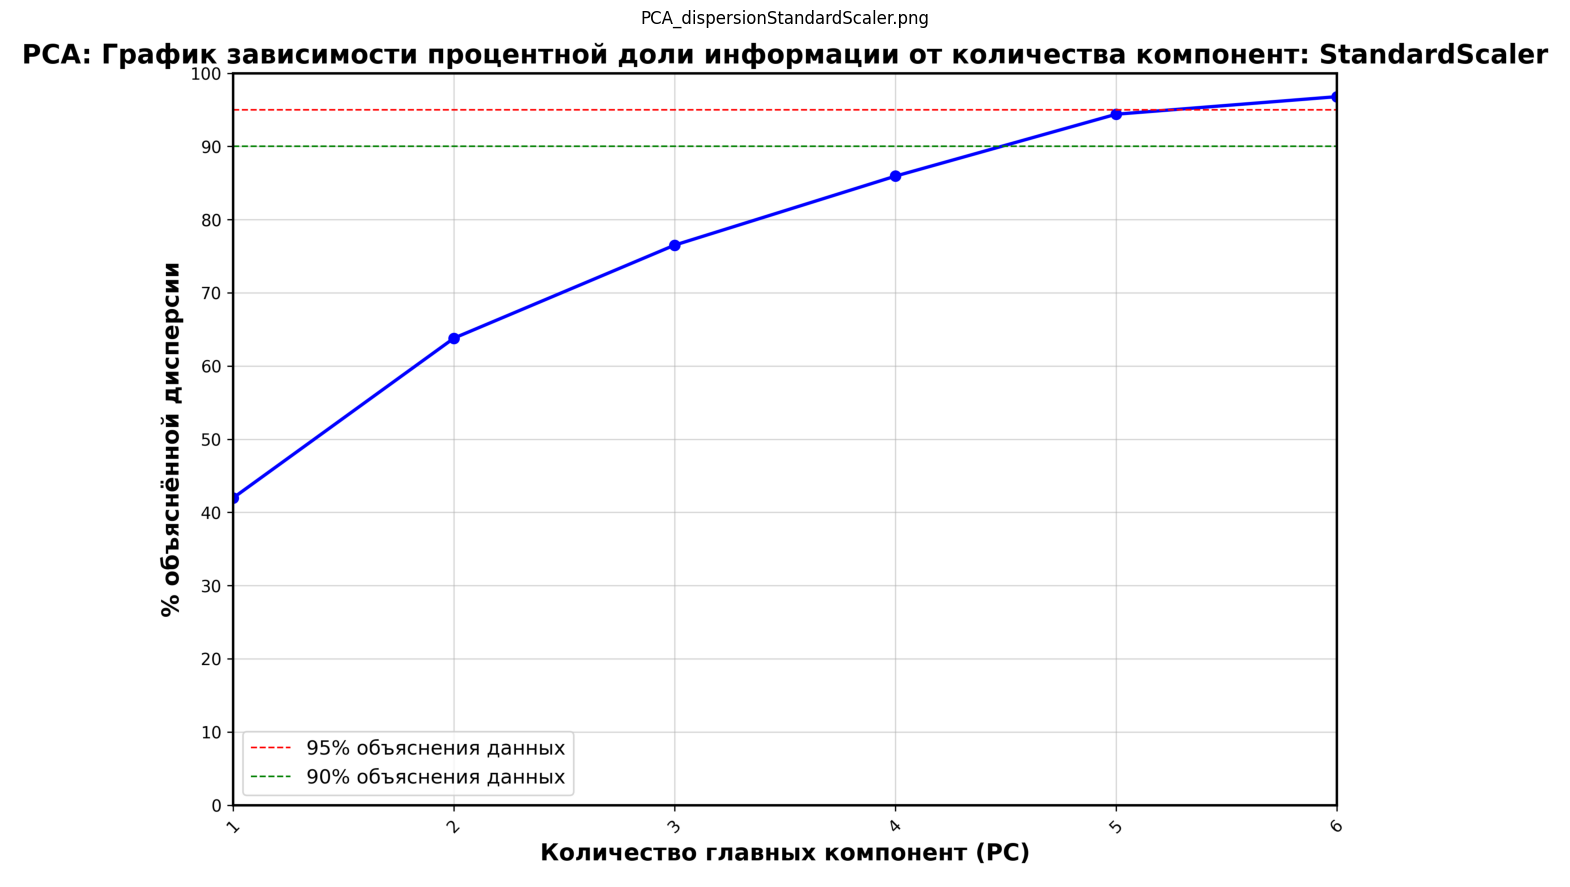

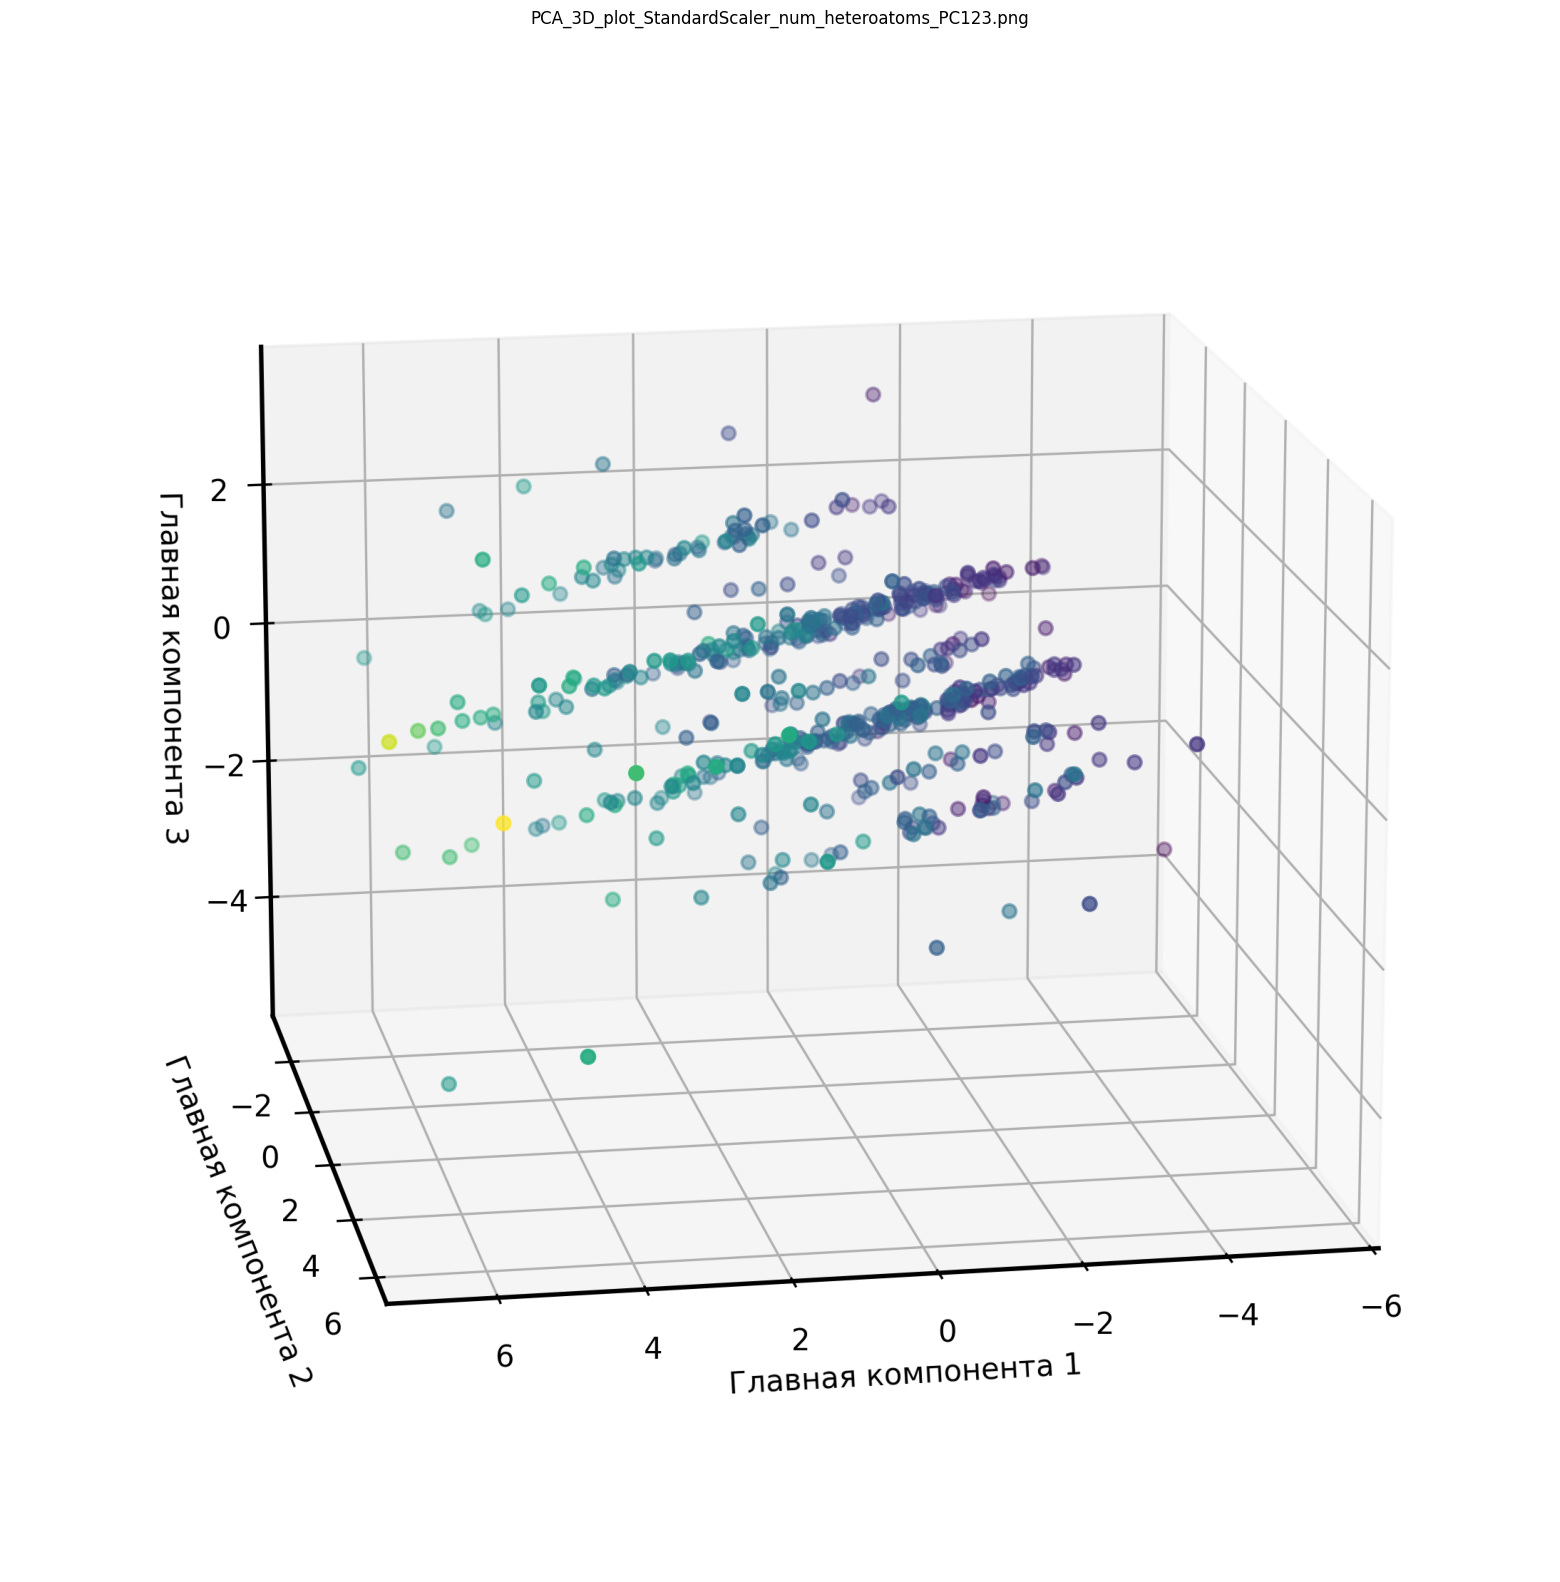

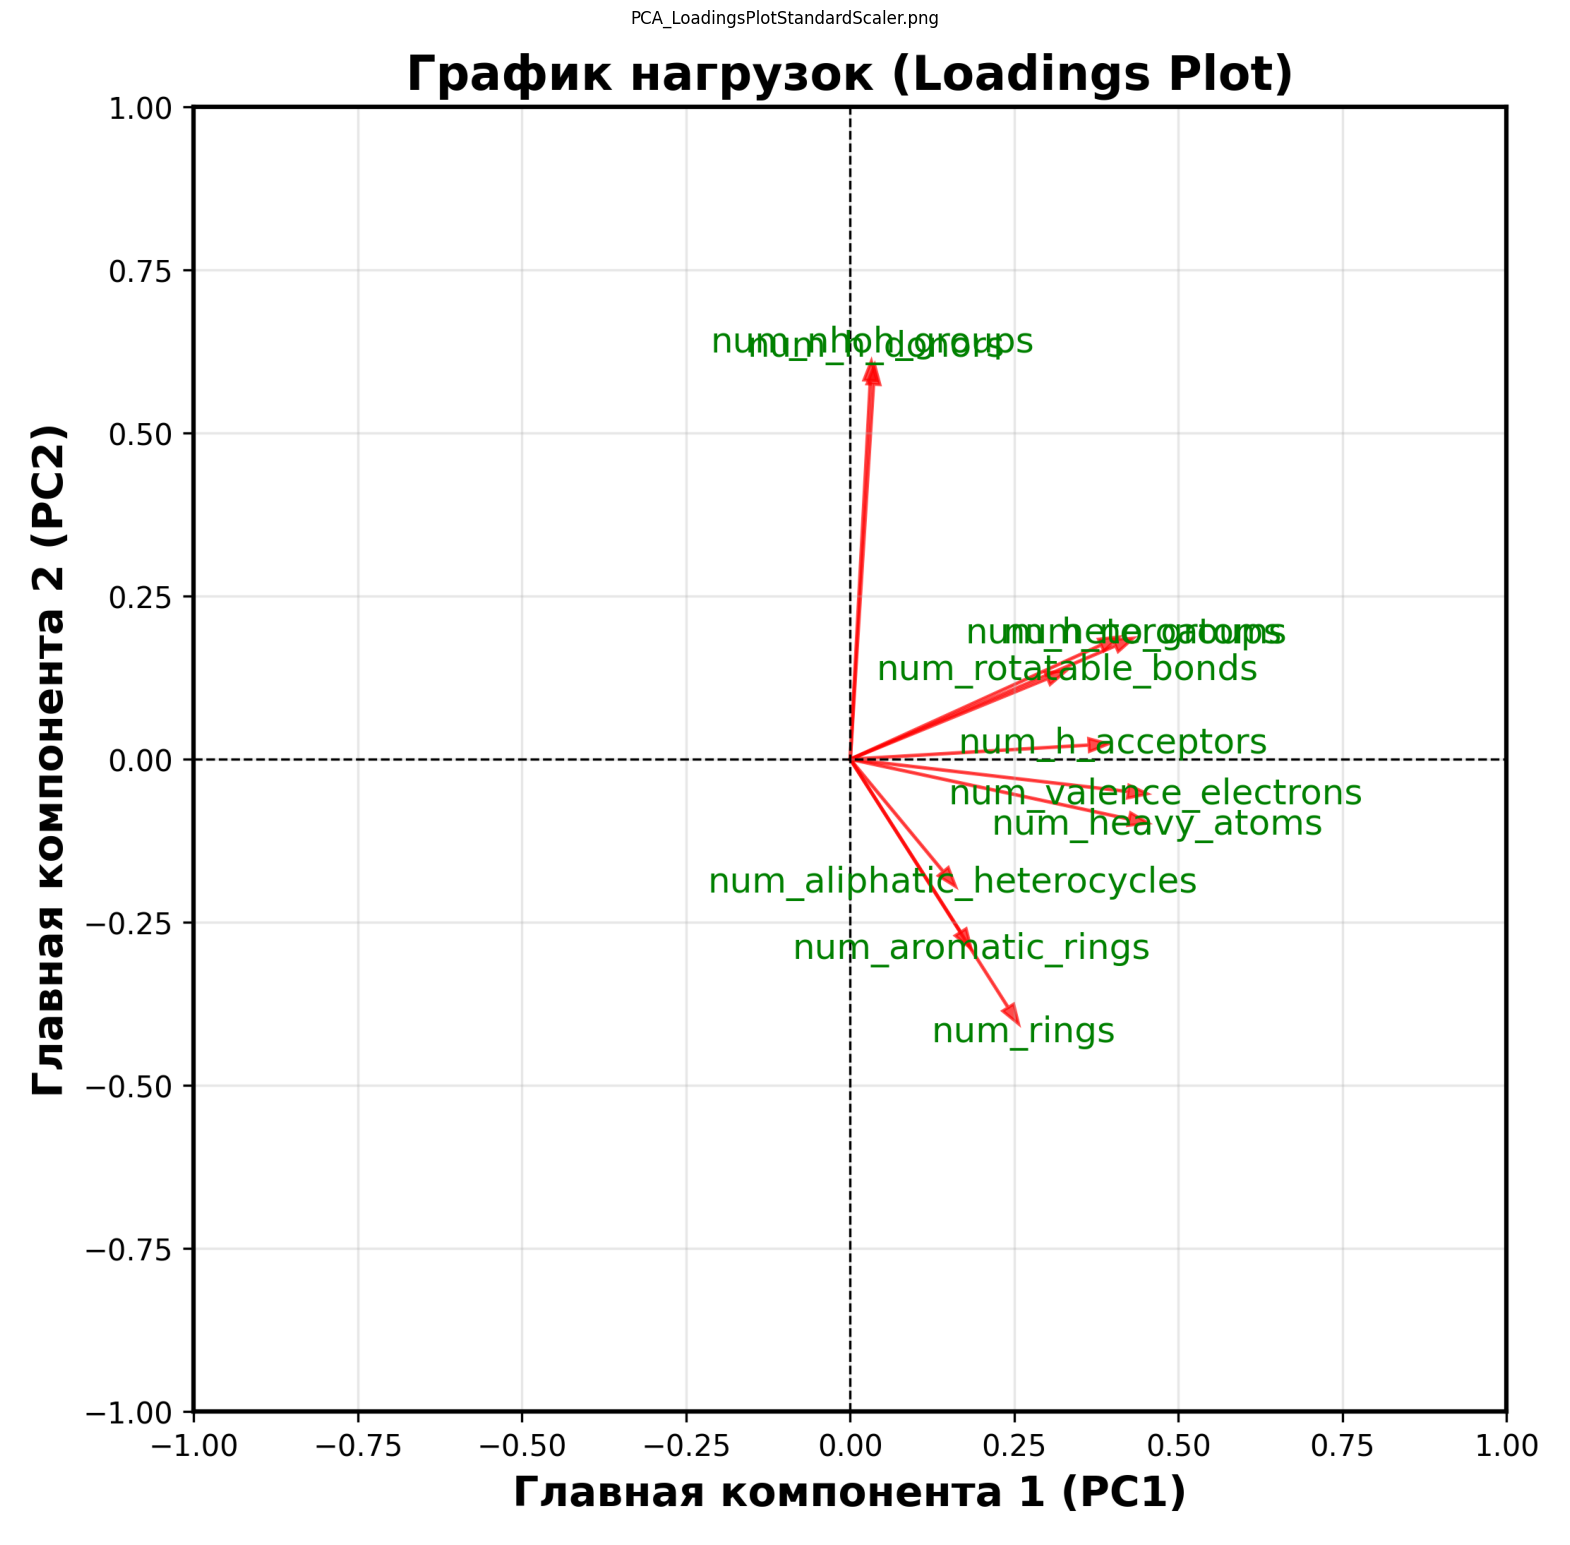

In [8]:
train_plots = './train_plots' 
for filename in os.listdir(train_plots):
    if "StandardScaler" in filename:
        img = mpimg.imread(os.path.join(train_plots, filename))
        plt.figure(figsize=(20,20)) 
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)
        plt.show()

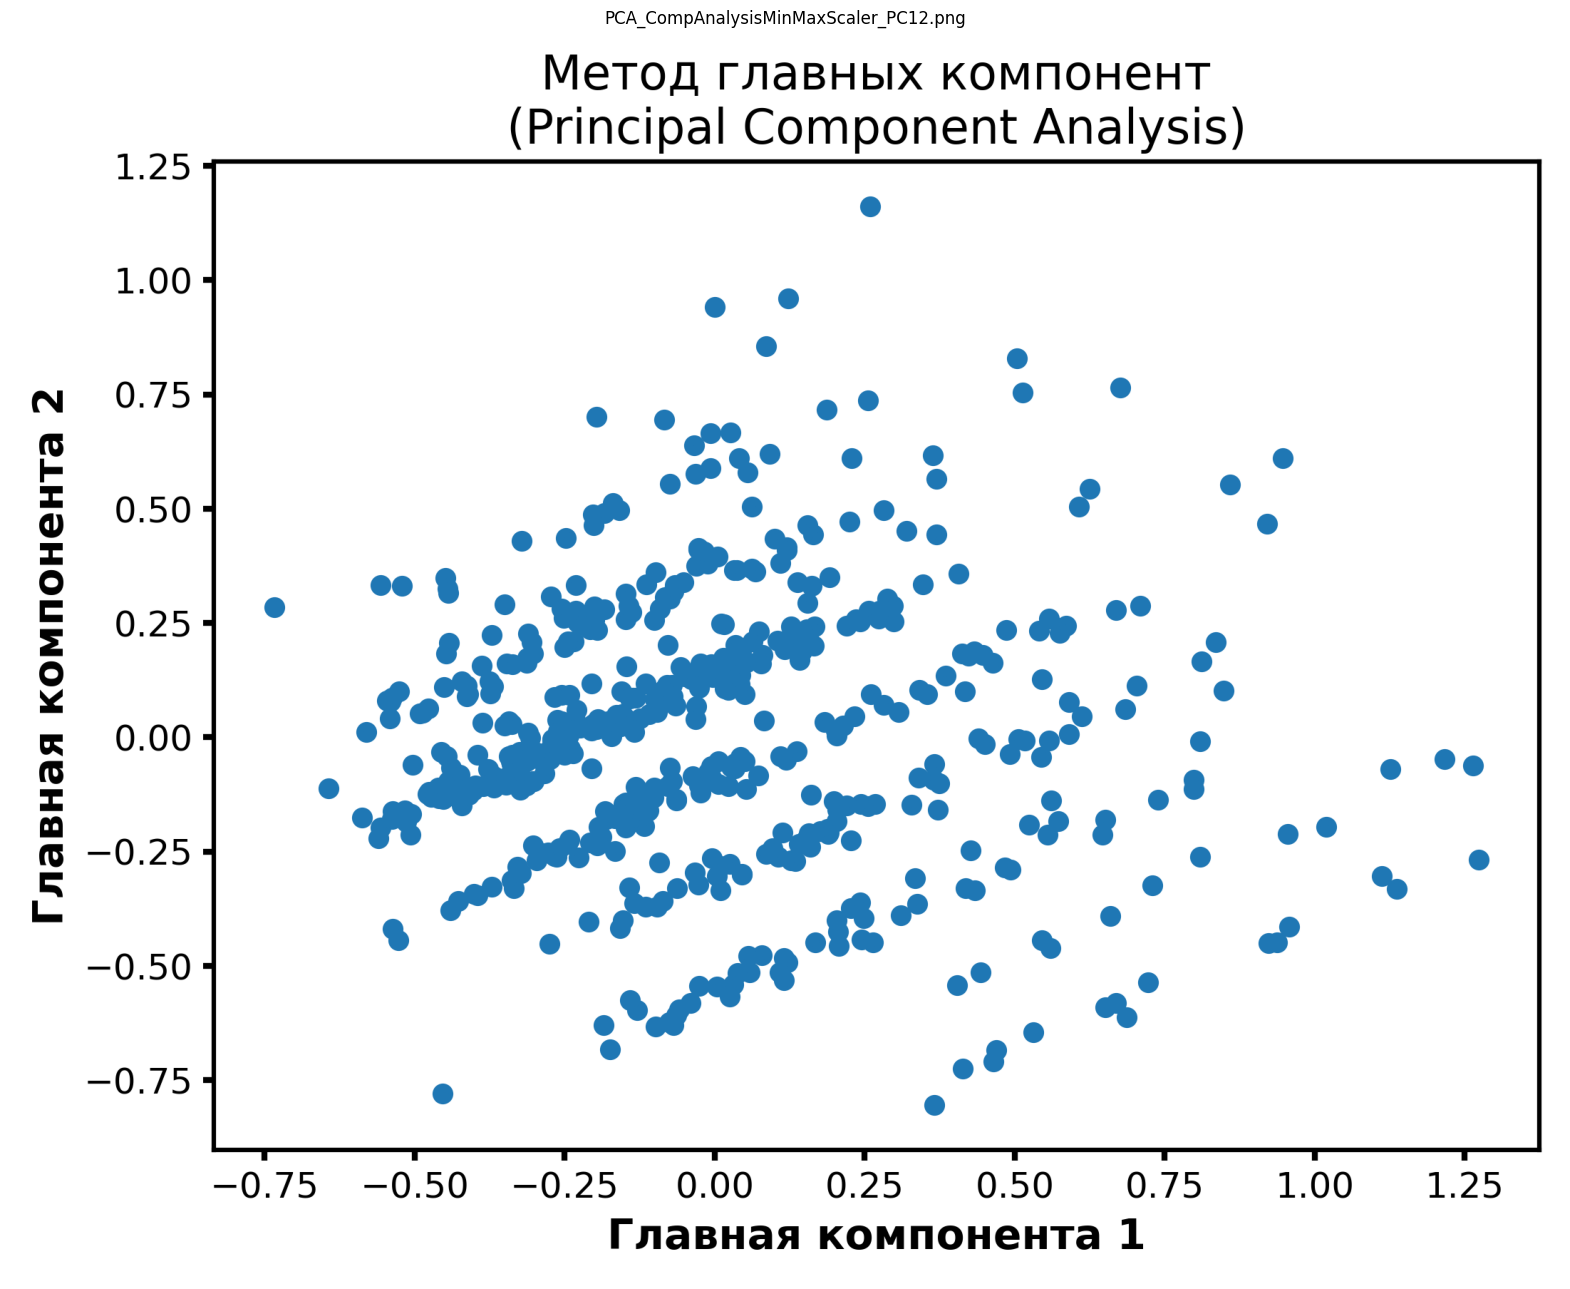

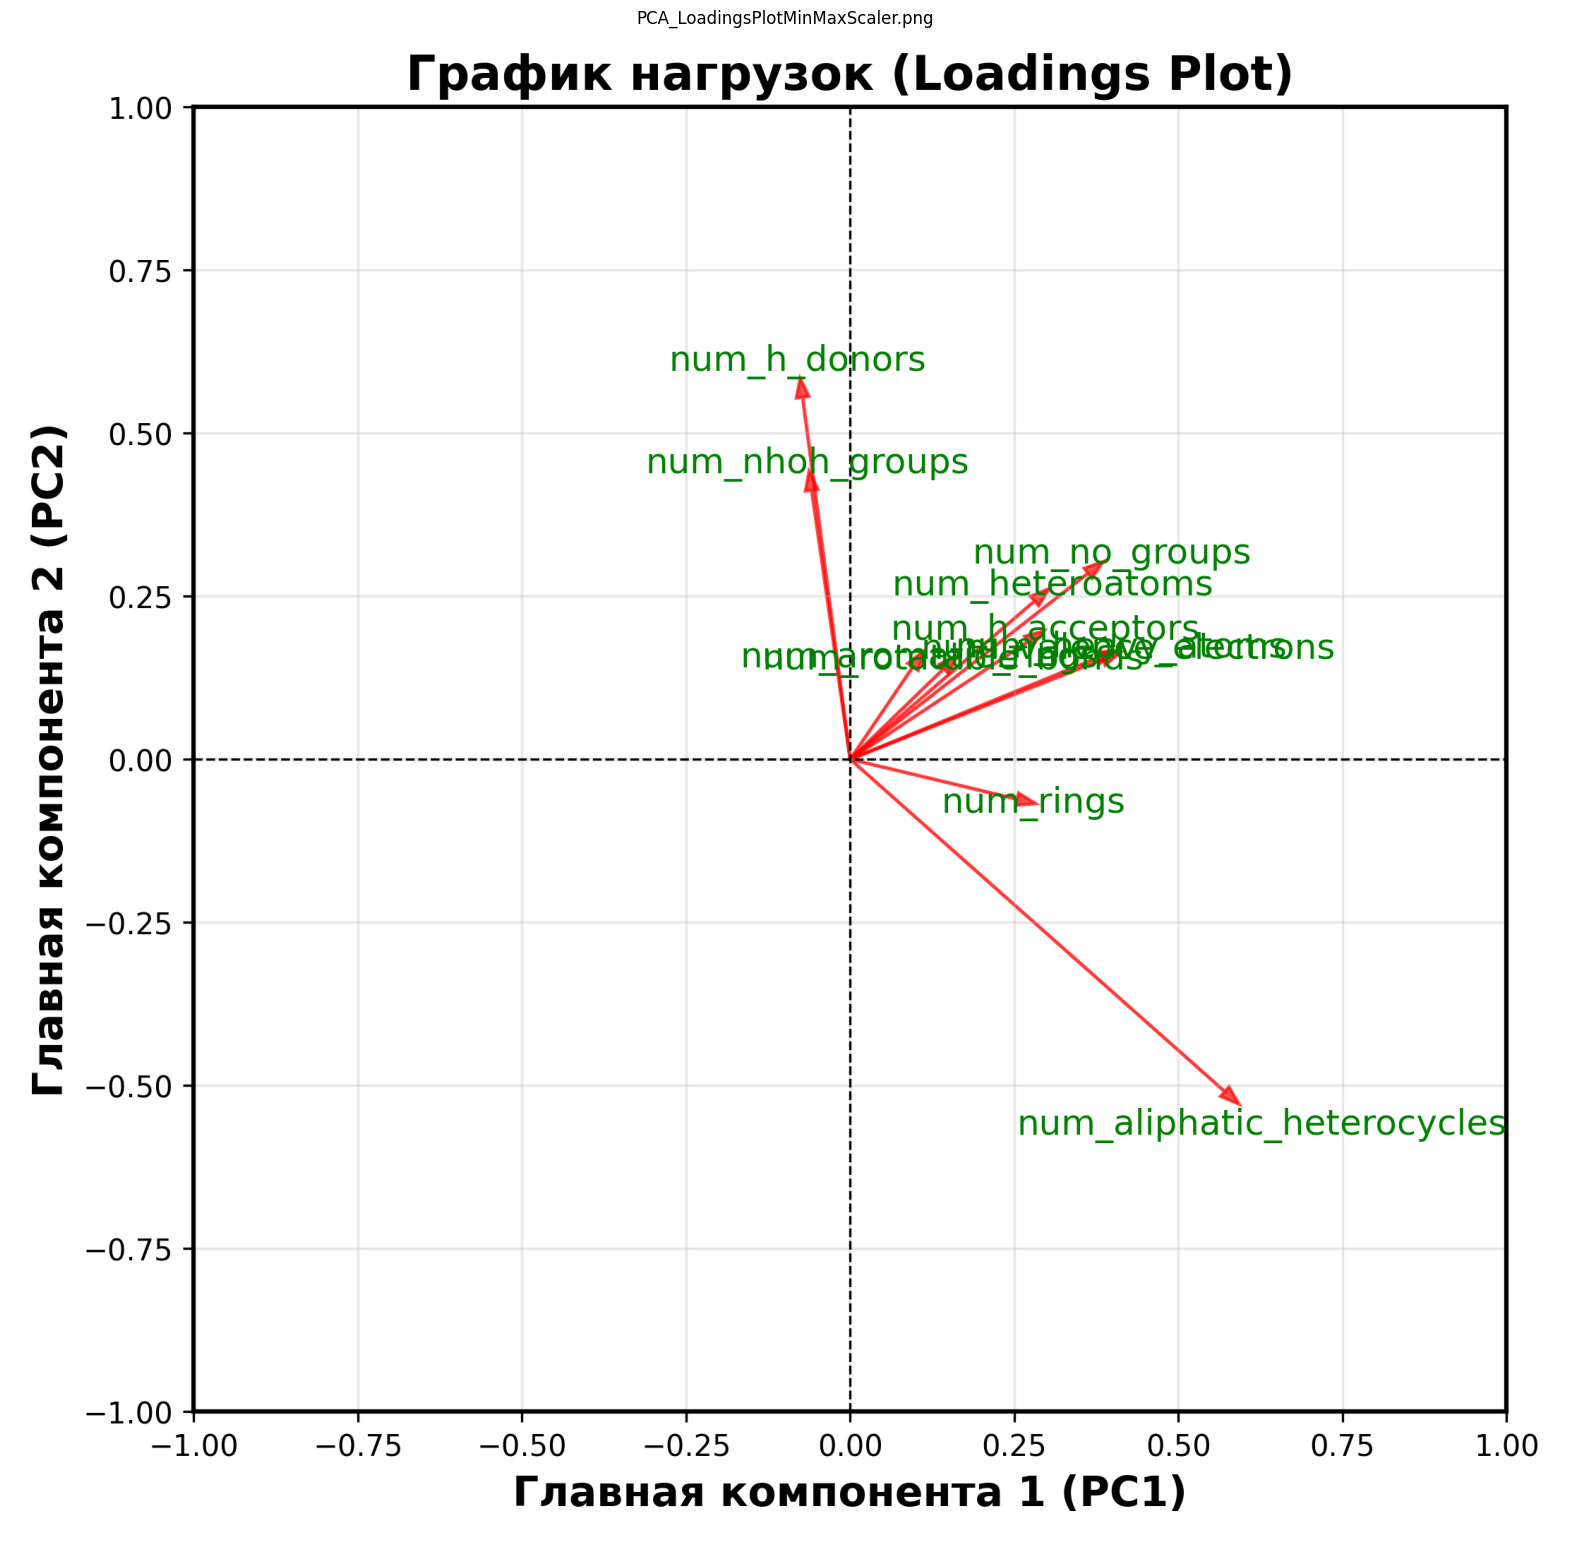

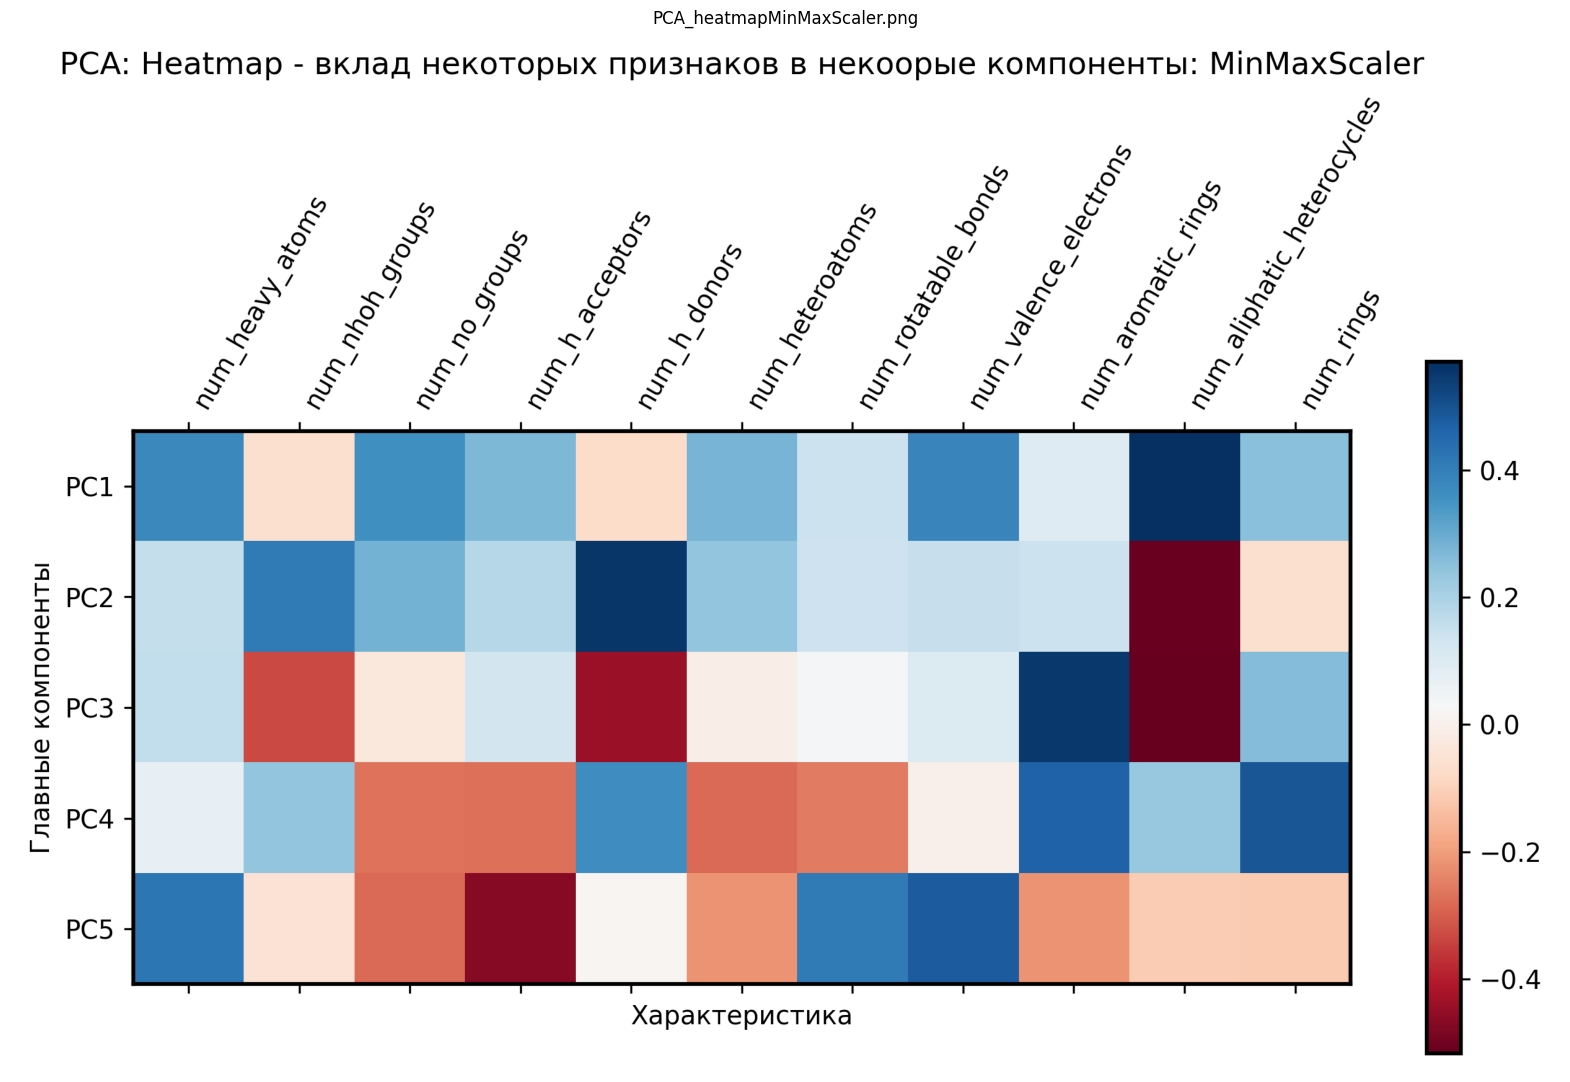

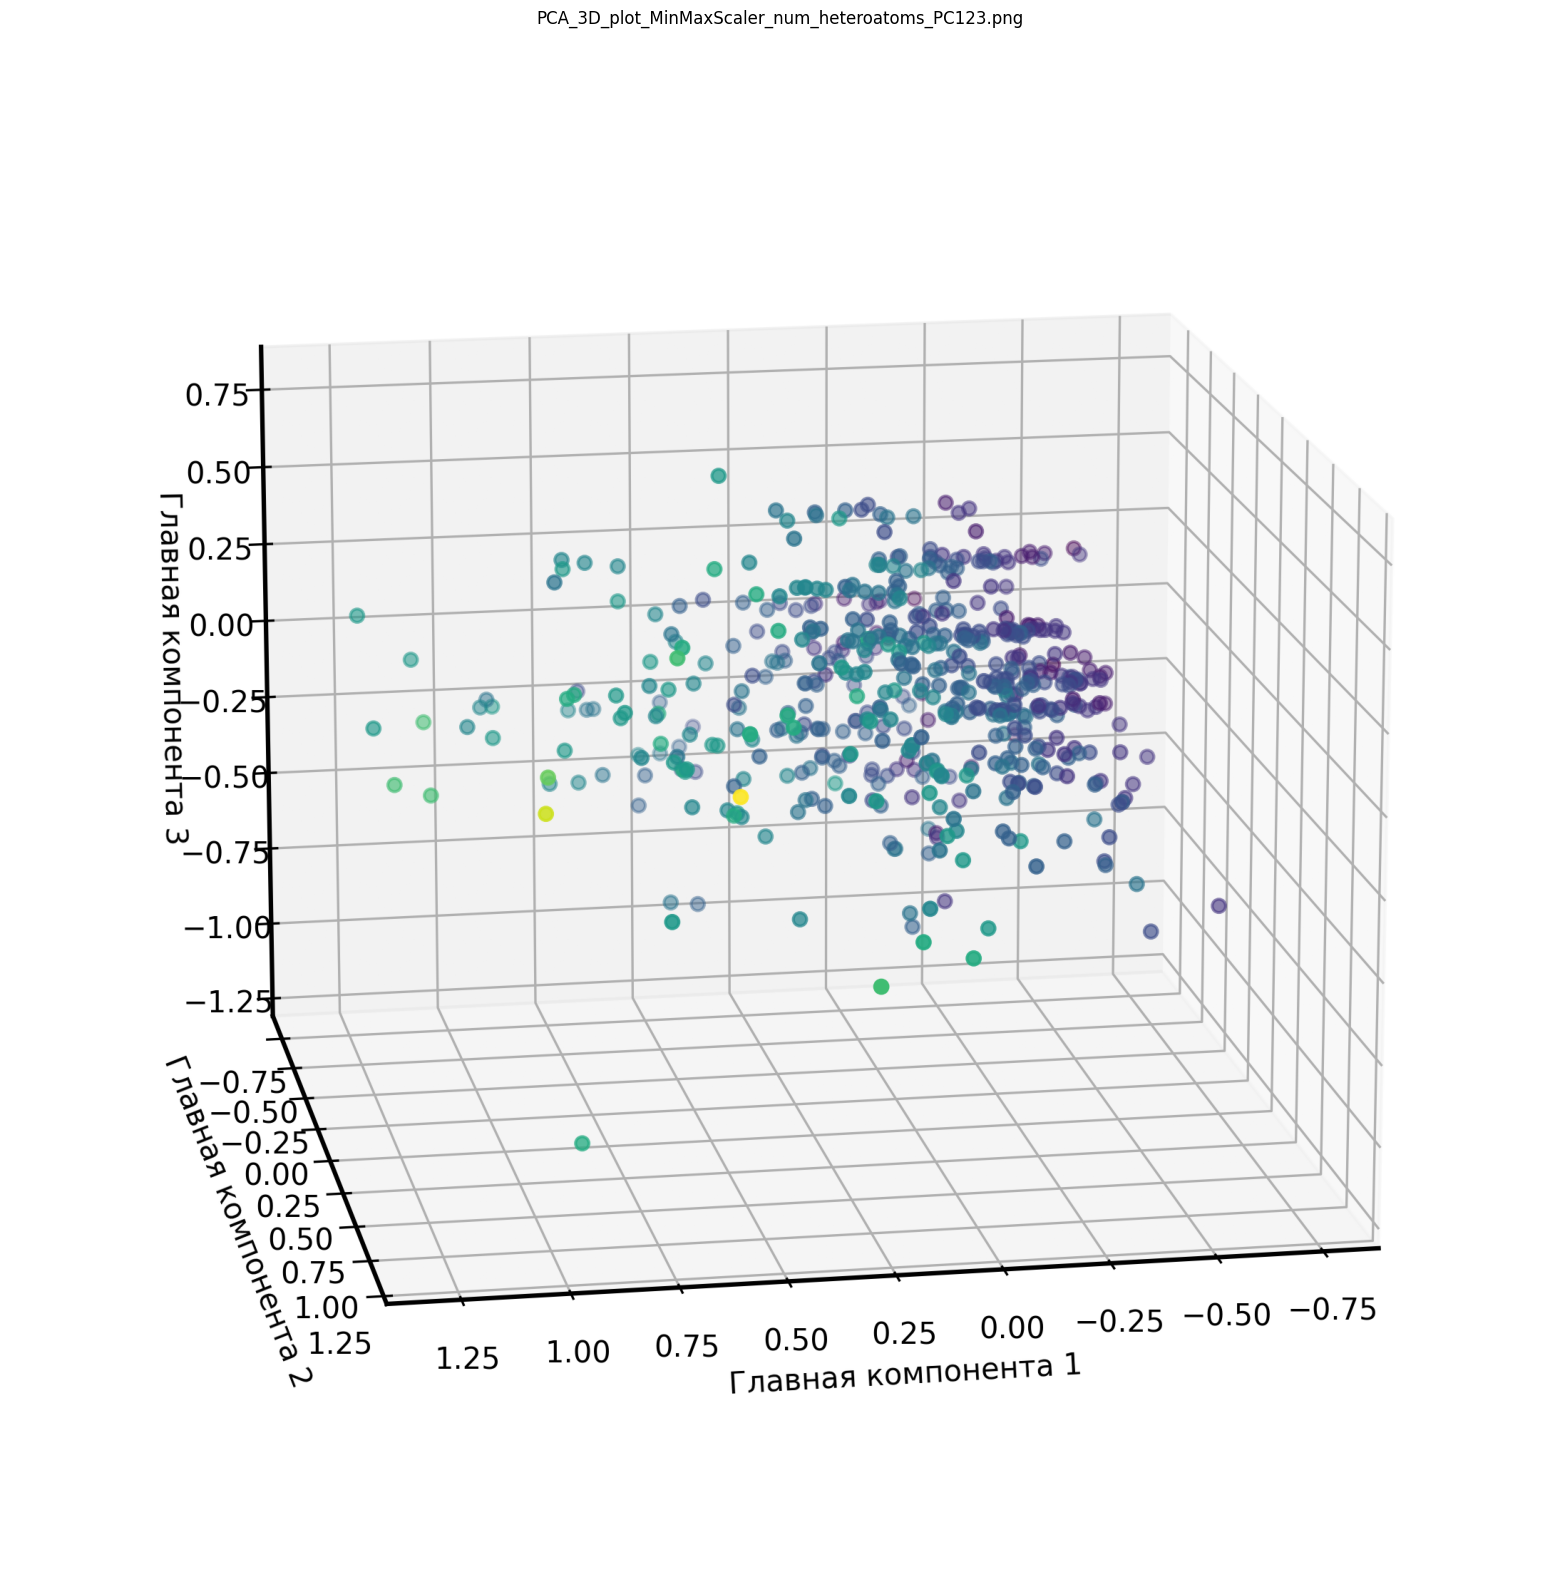

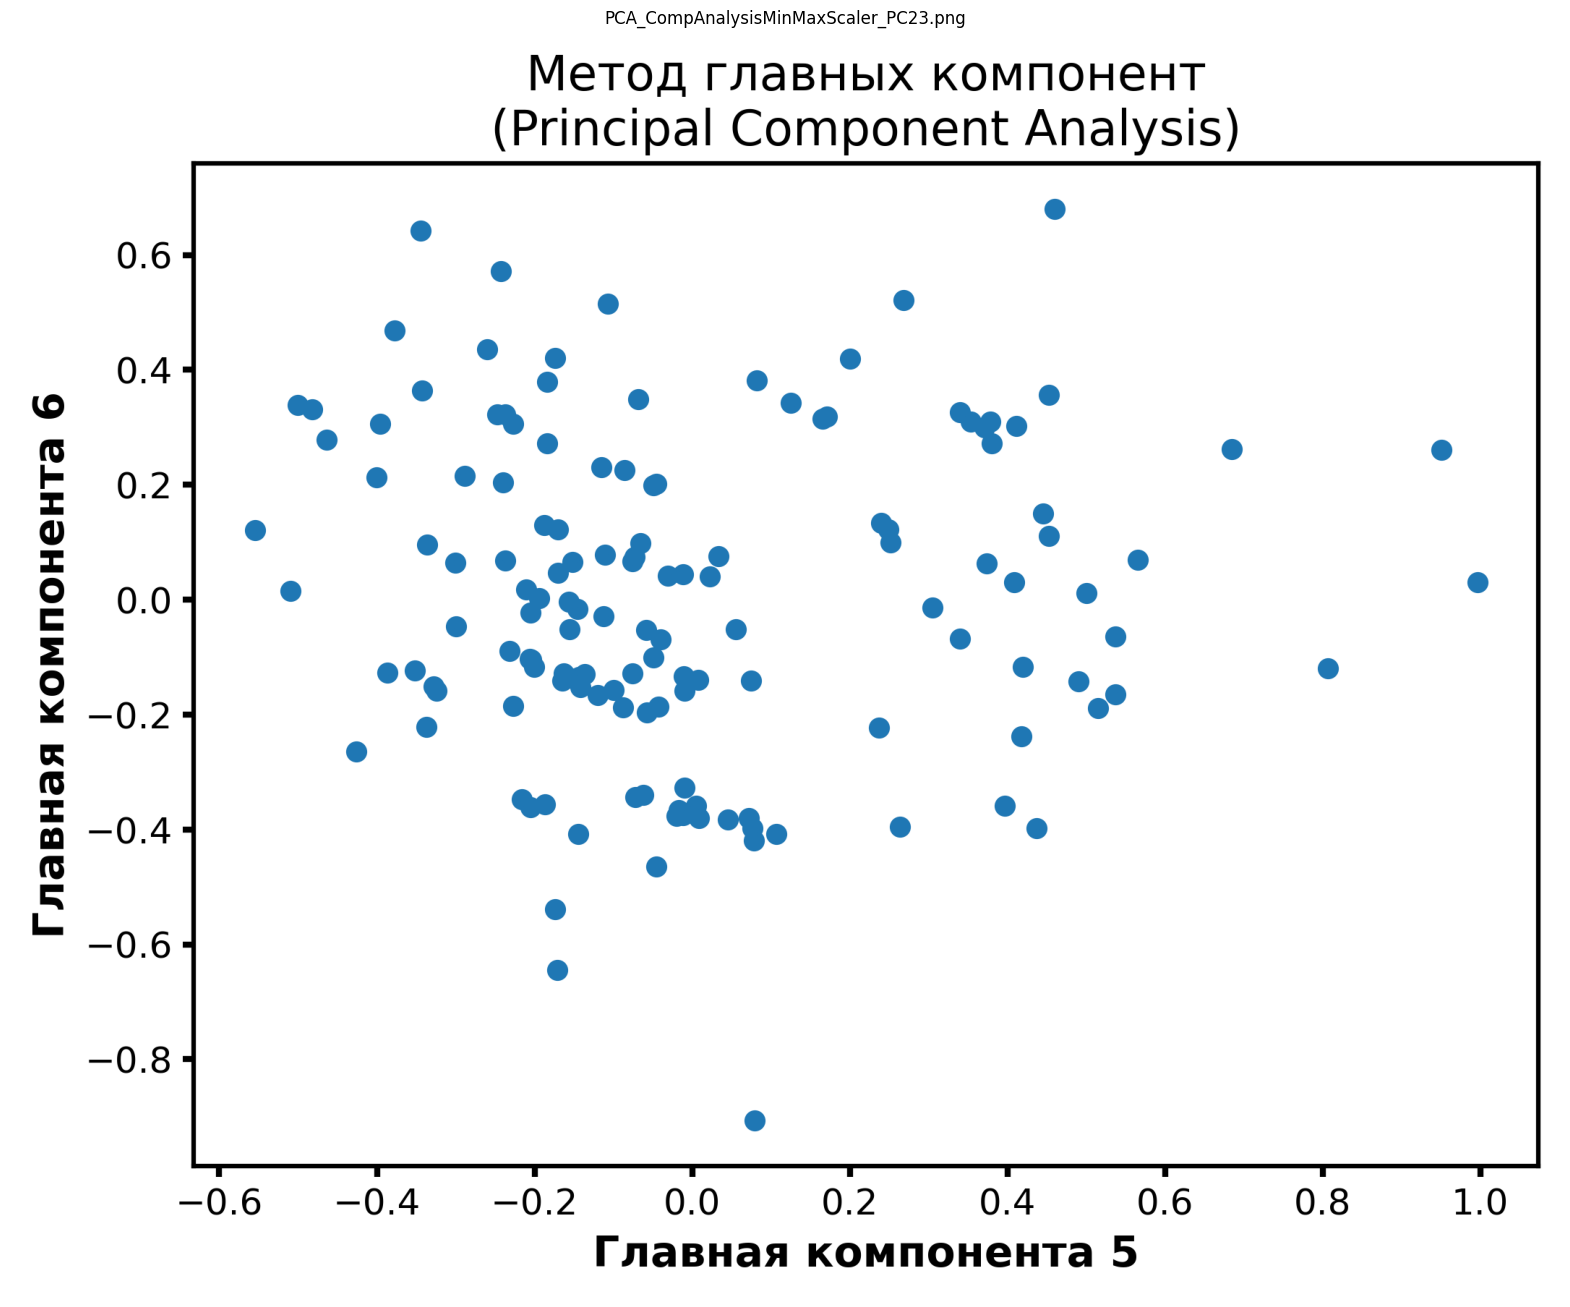

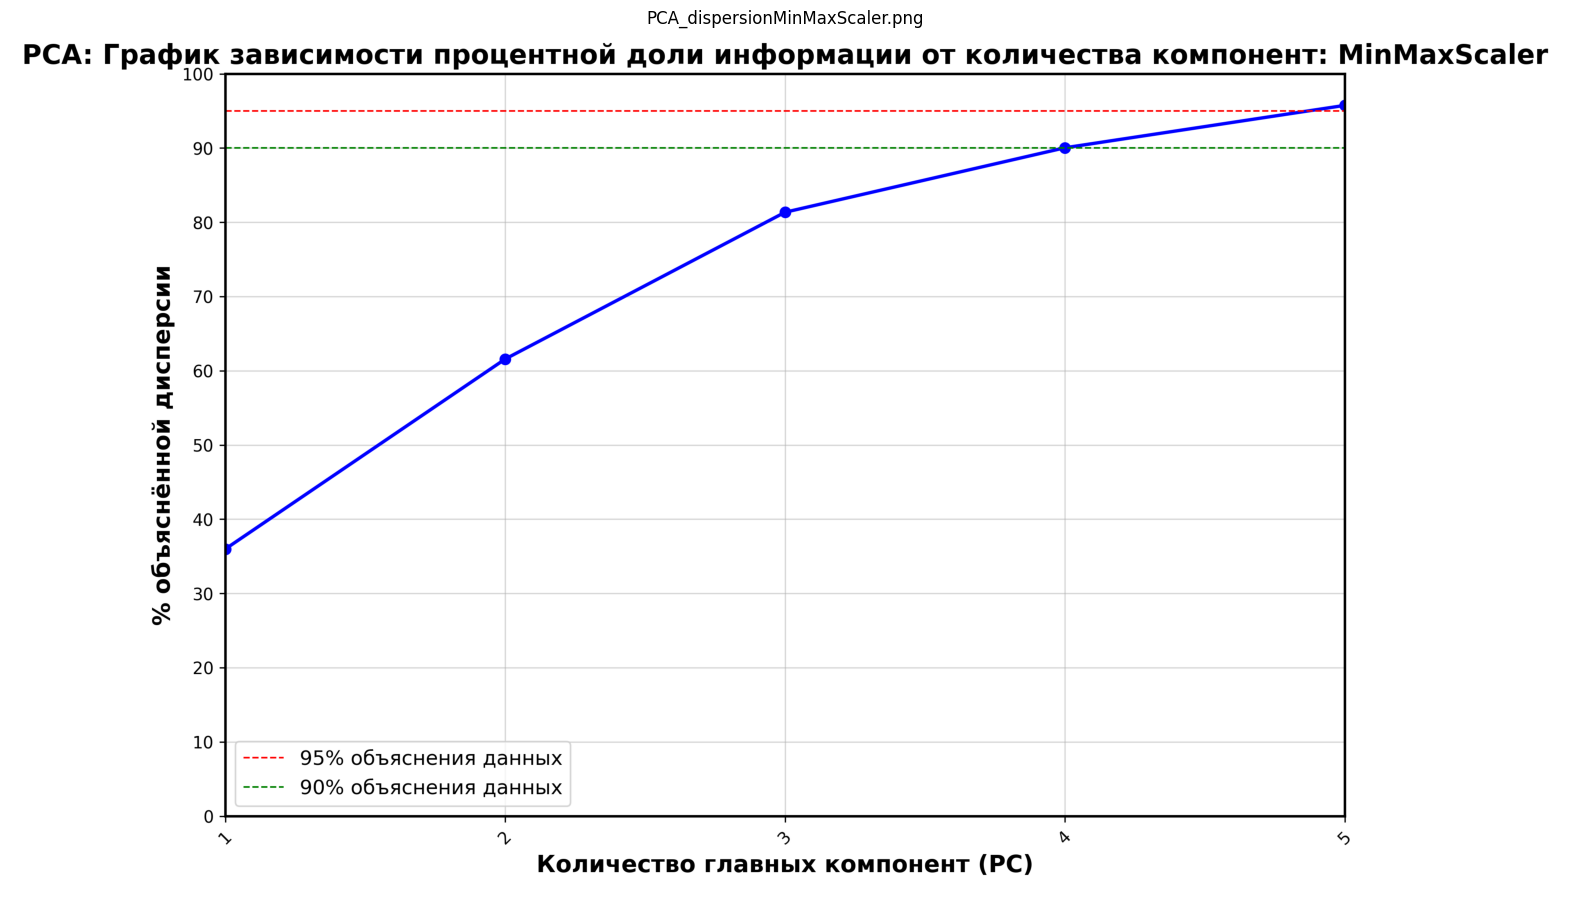

In [9]:
for filename in os.listdir(train_plots):
    if "MinMaxScaler" in filename:
        img = mpimg.imread(os.path.join(train_plots, filename))
        plt.figure(figsize=(20,20)) 
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)
        plt.show()

> Для MinMax масштабирования 5 компонент объясняют 95% данных

> Одни и те же признаки в разных компонентах имеют разные знаки коэффициентов

Тестовые данные

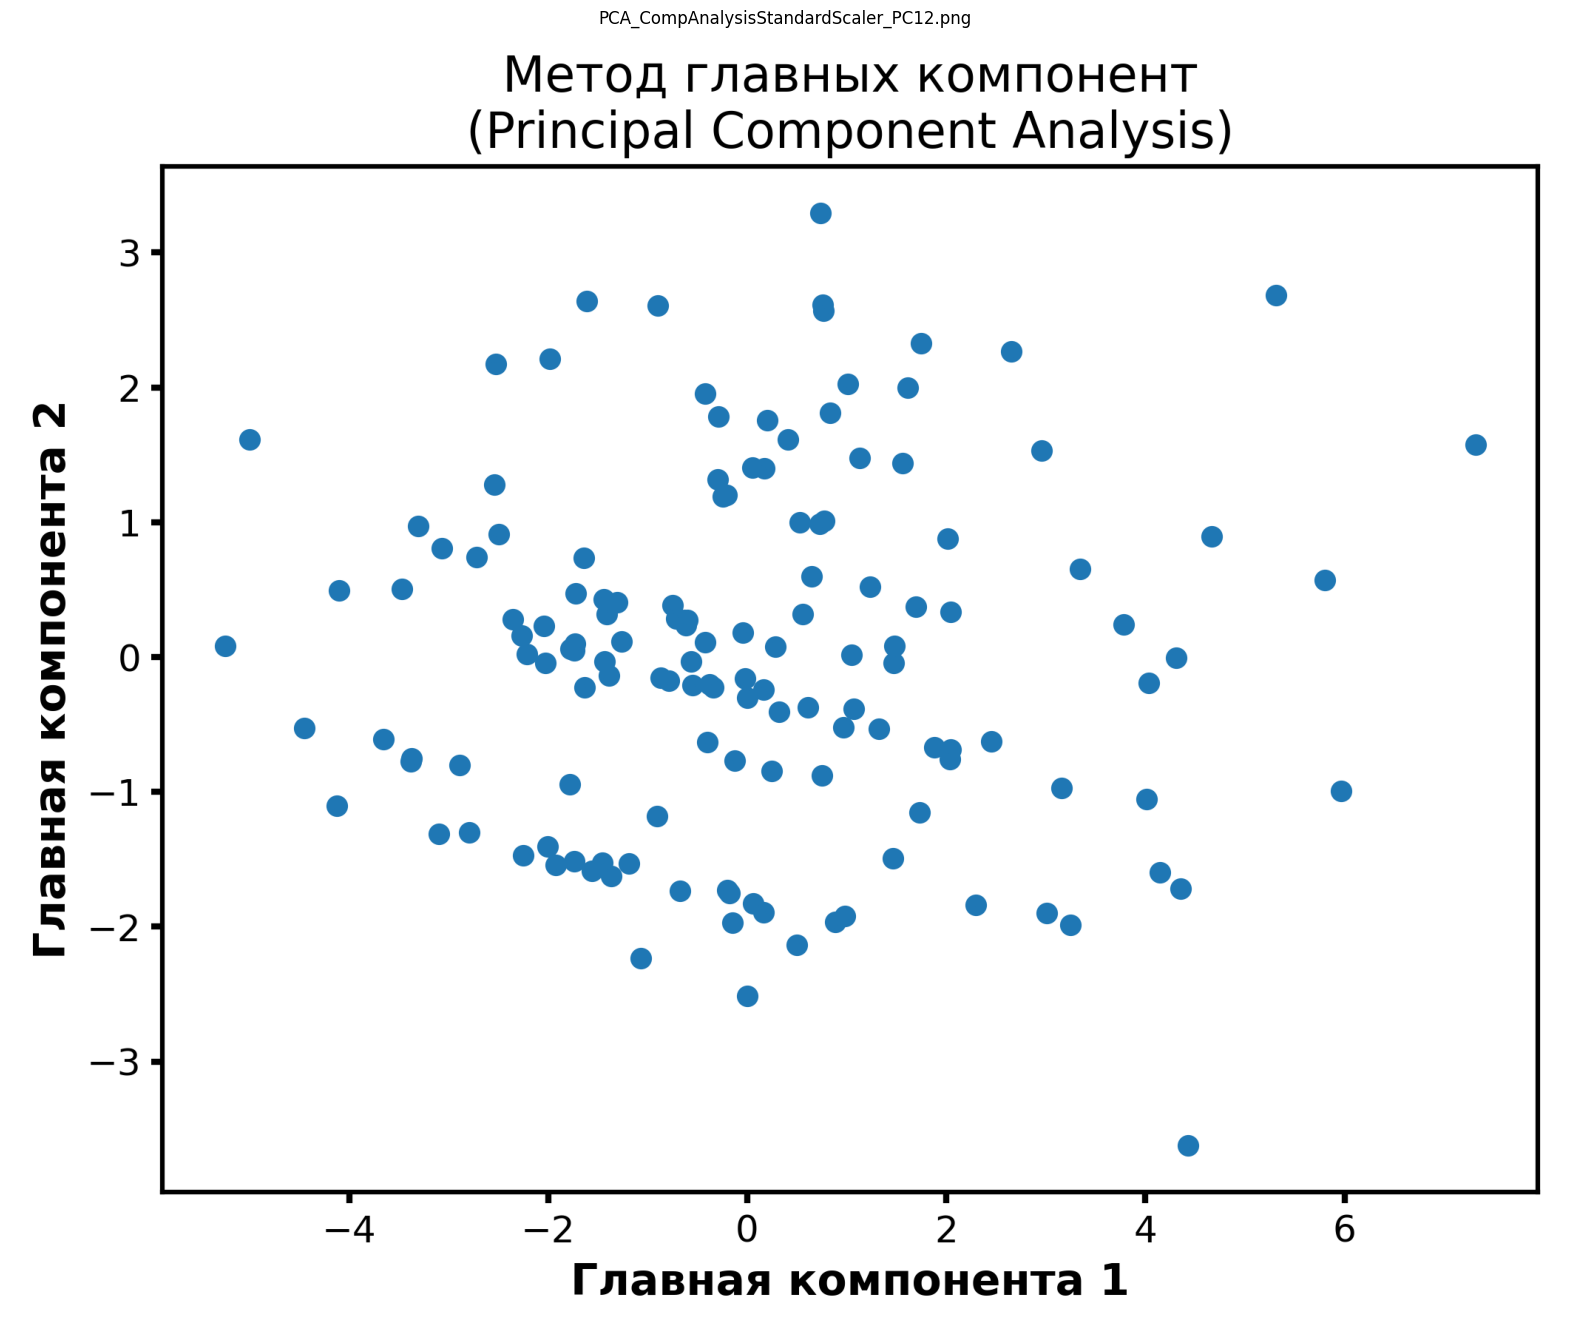

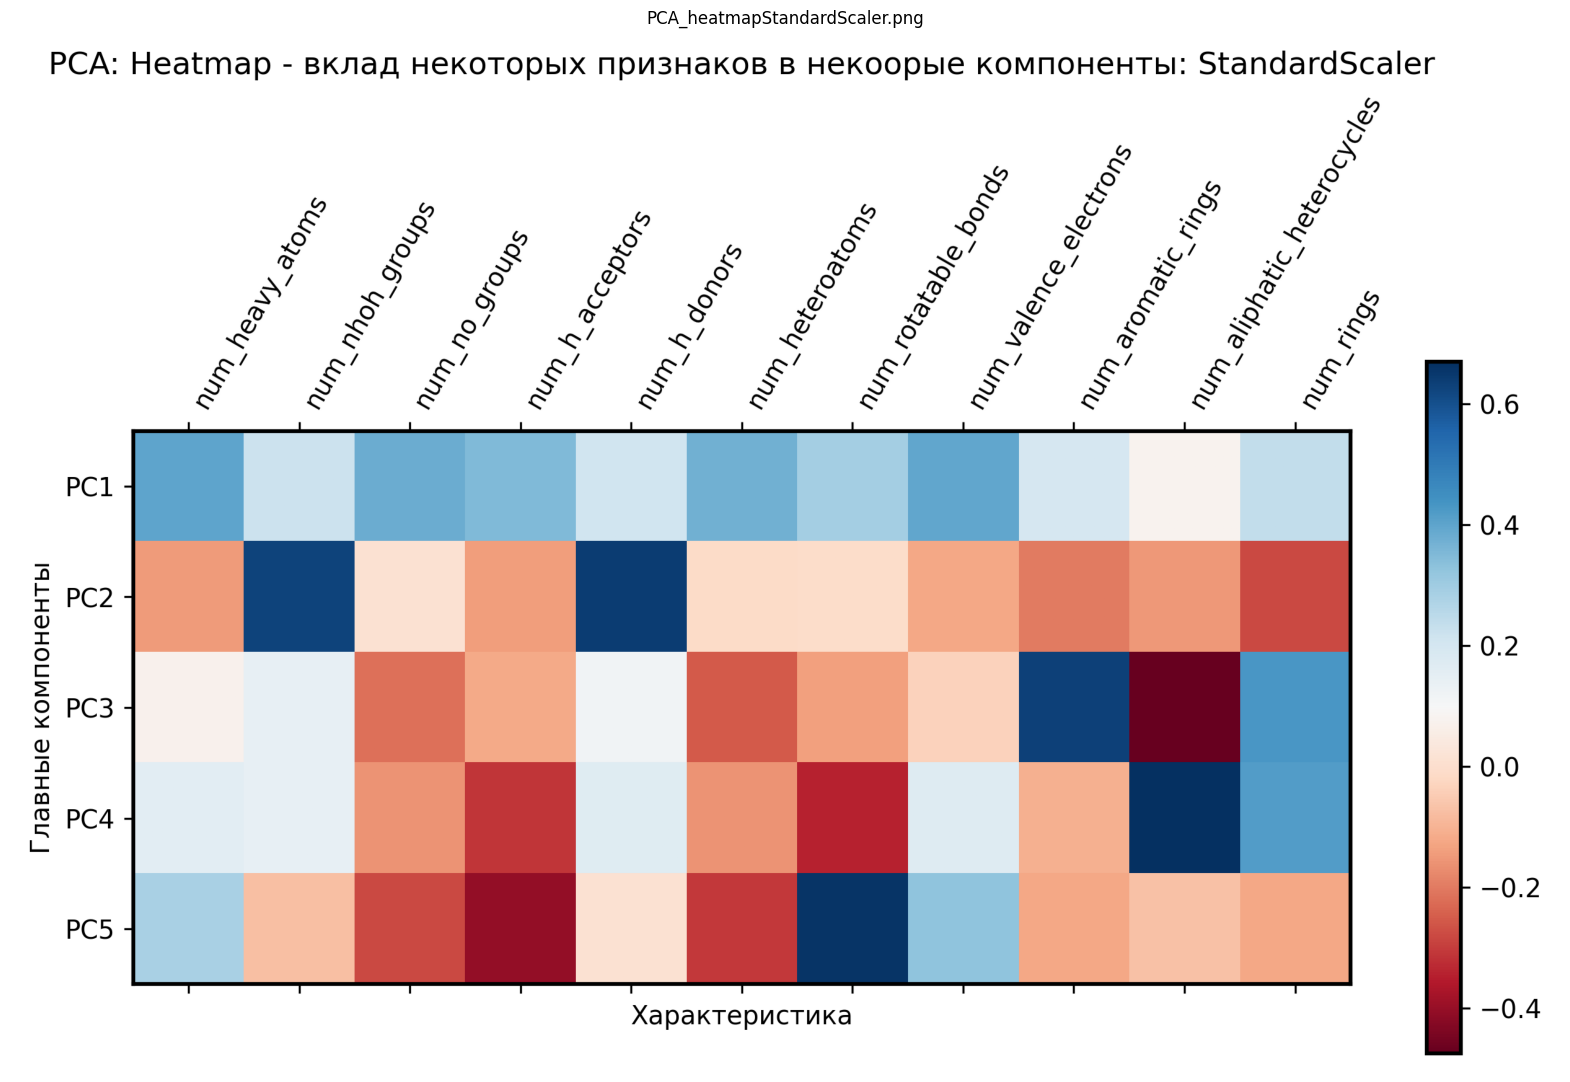

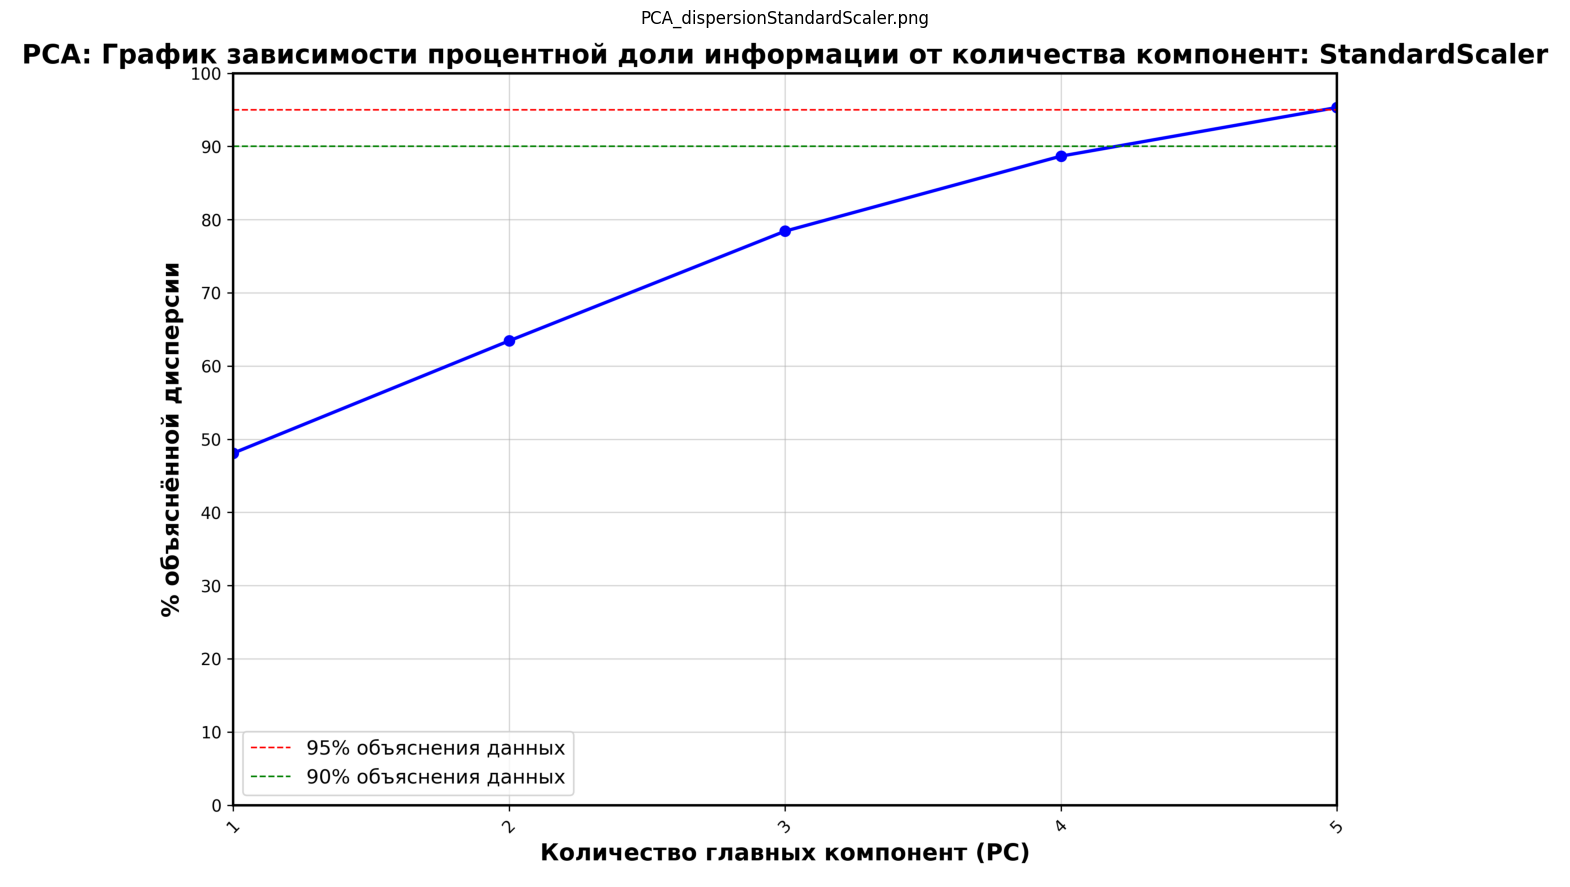

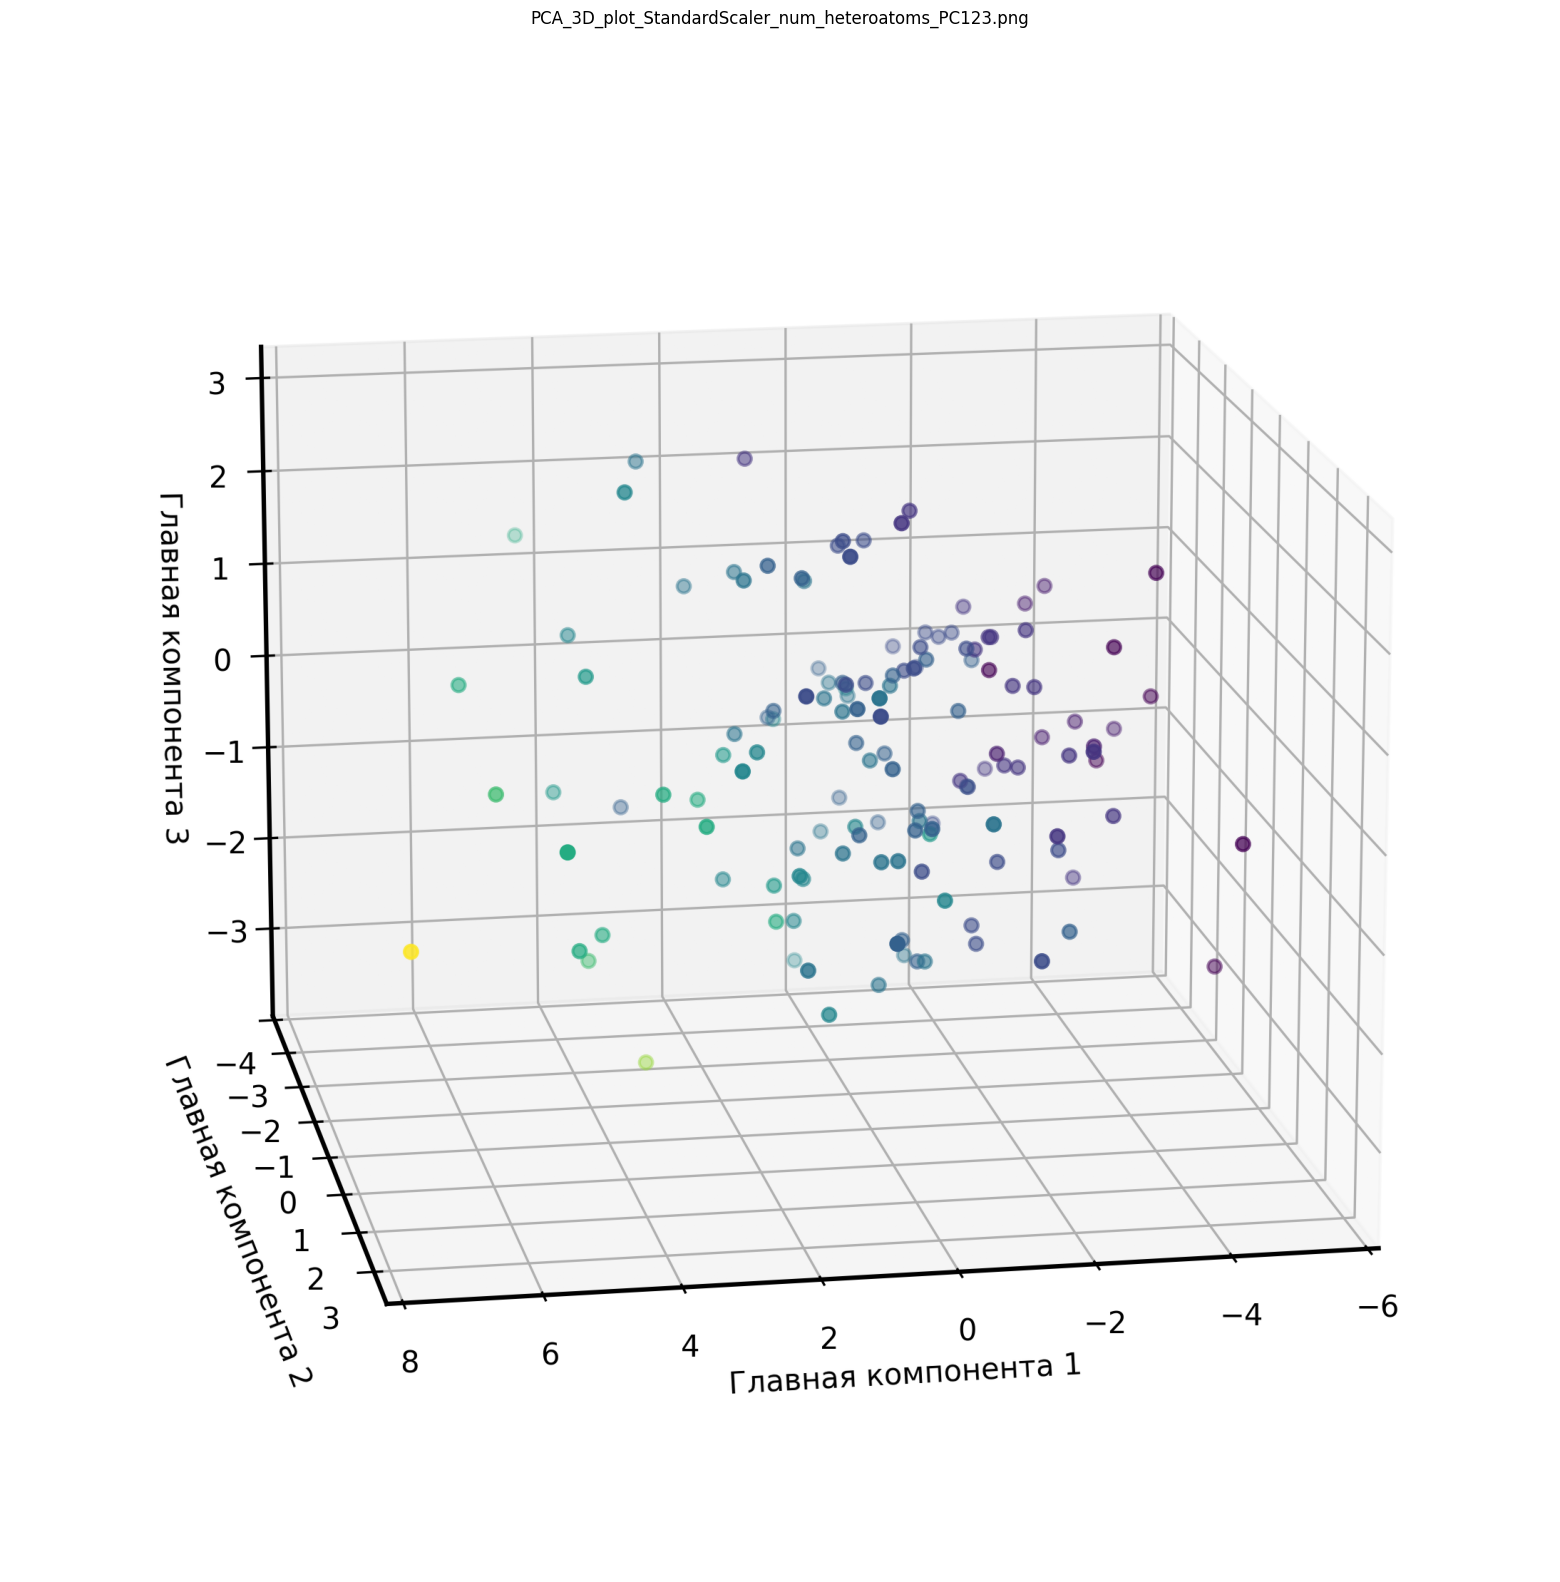

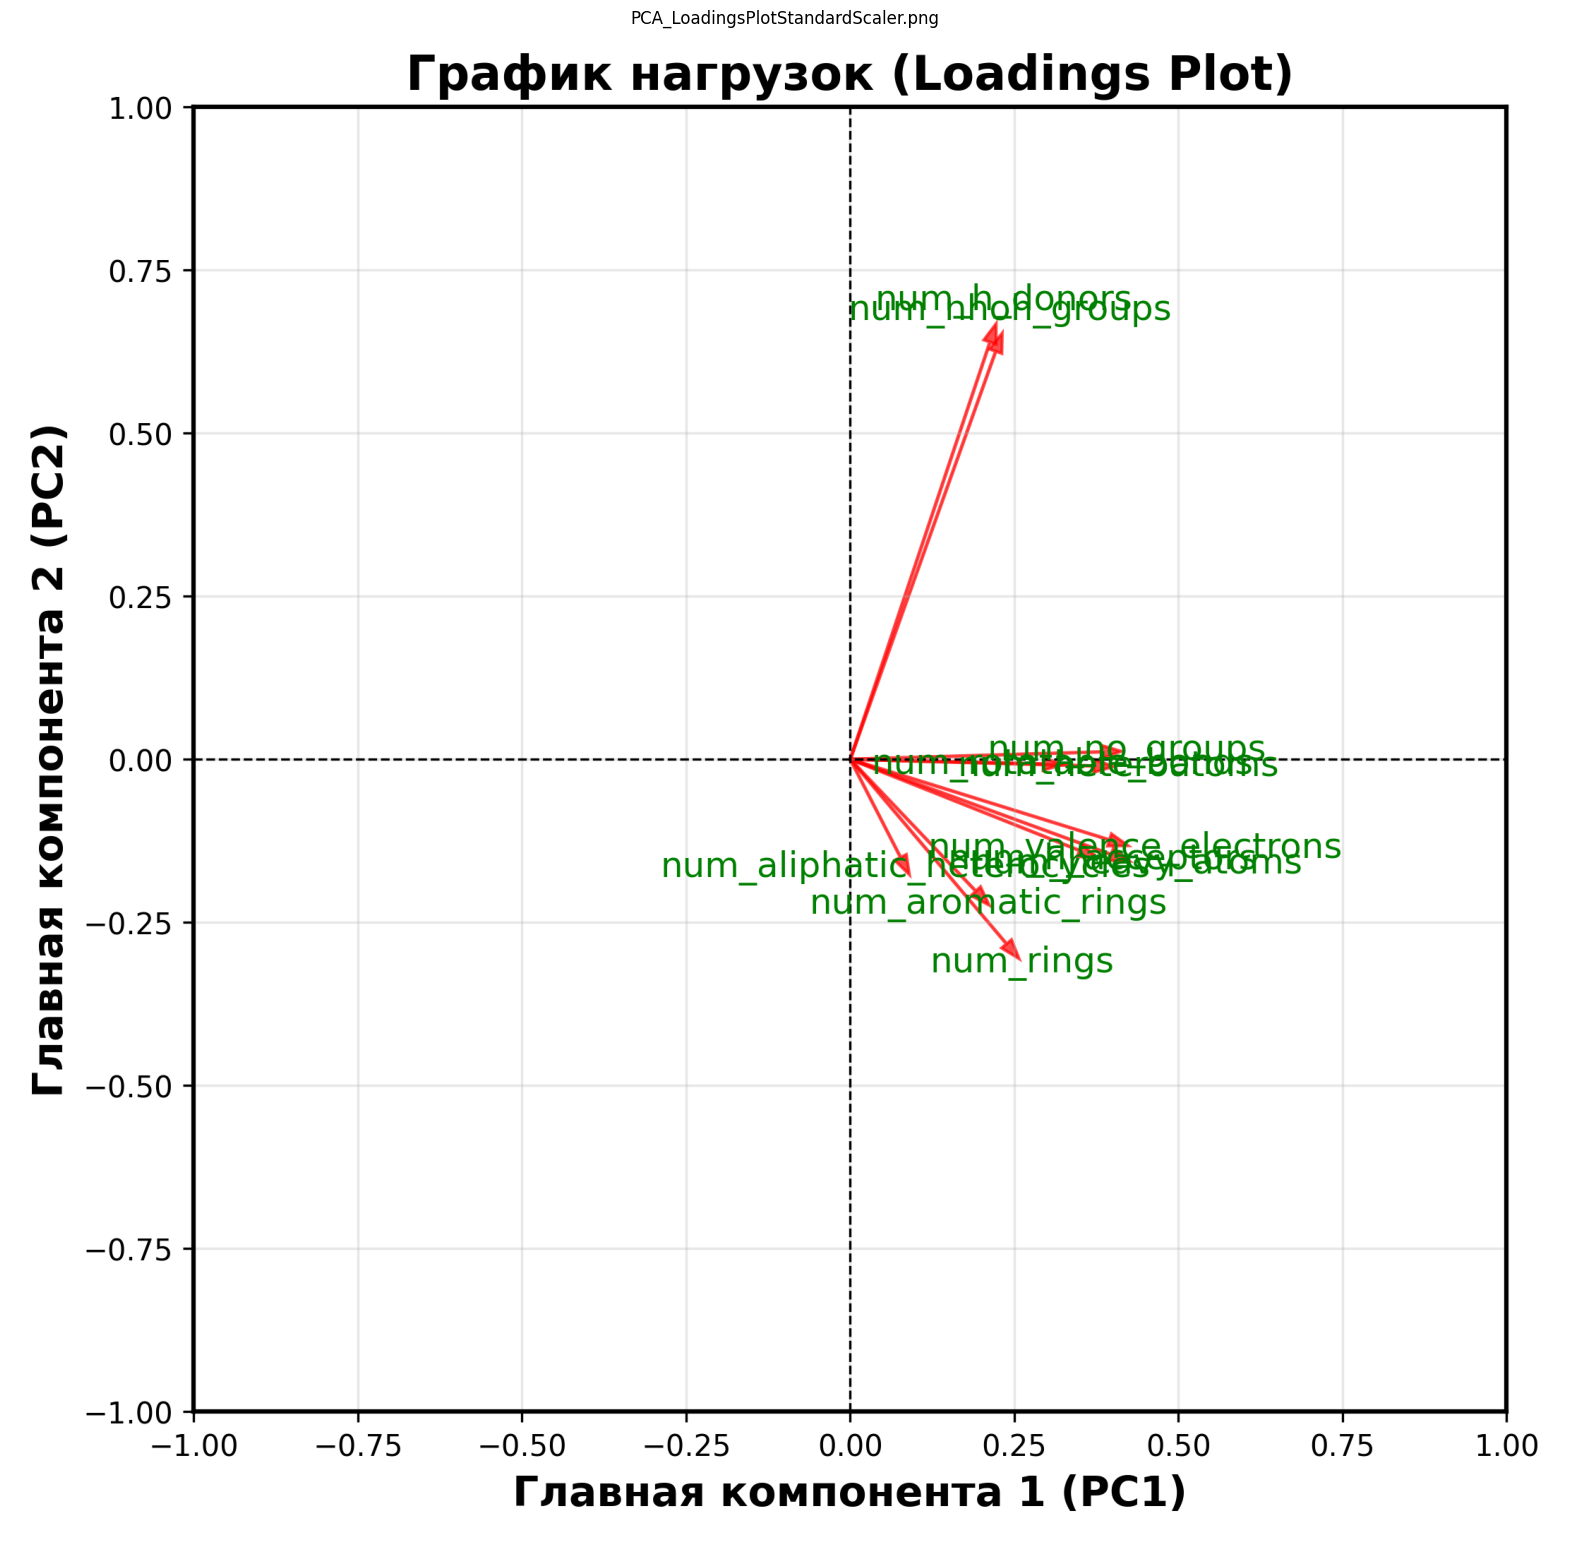

In [10]:
test_plots = './test_plots' 
for filename in os.listdir(test_plots):
    if "StandardScaler" in filename:
        img = mpimg.imread(os.path.join(test_plots, filename))
        plt.figure(figsize=(20,20)) 
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)
        plt.show()

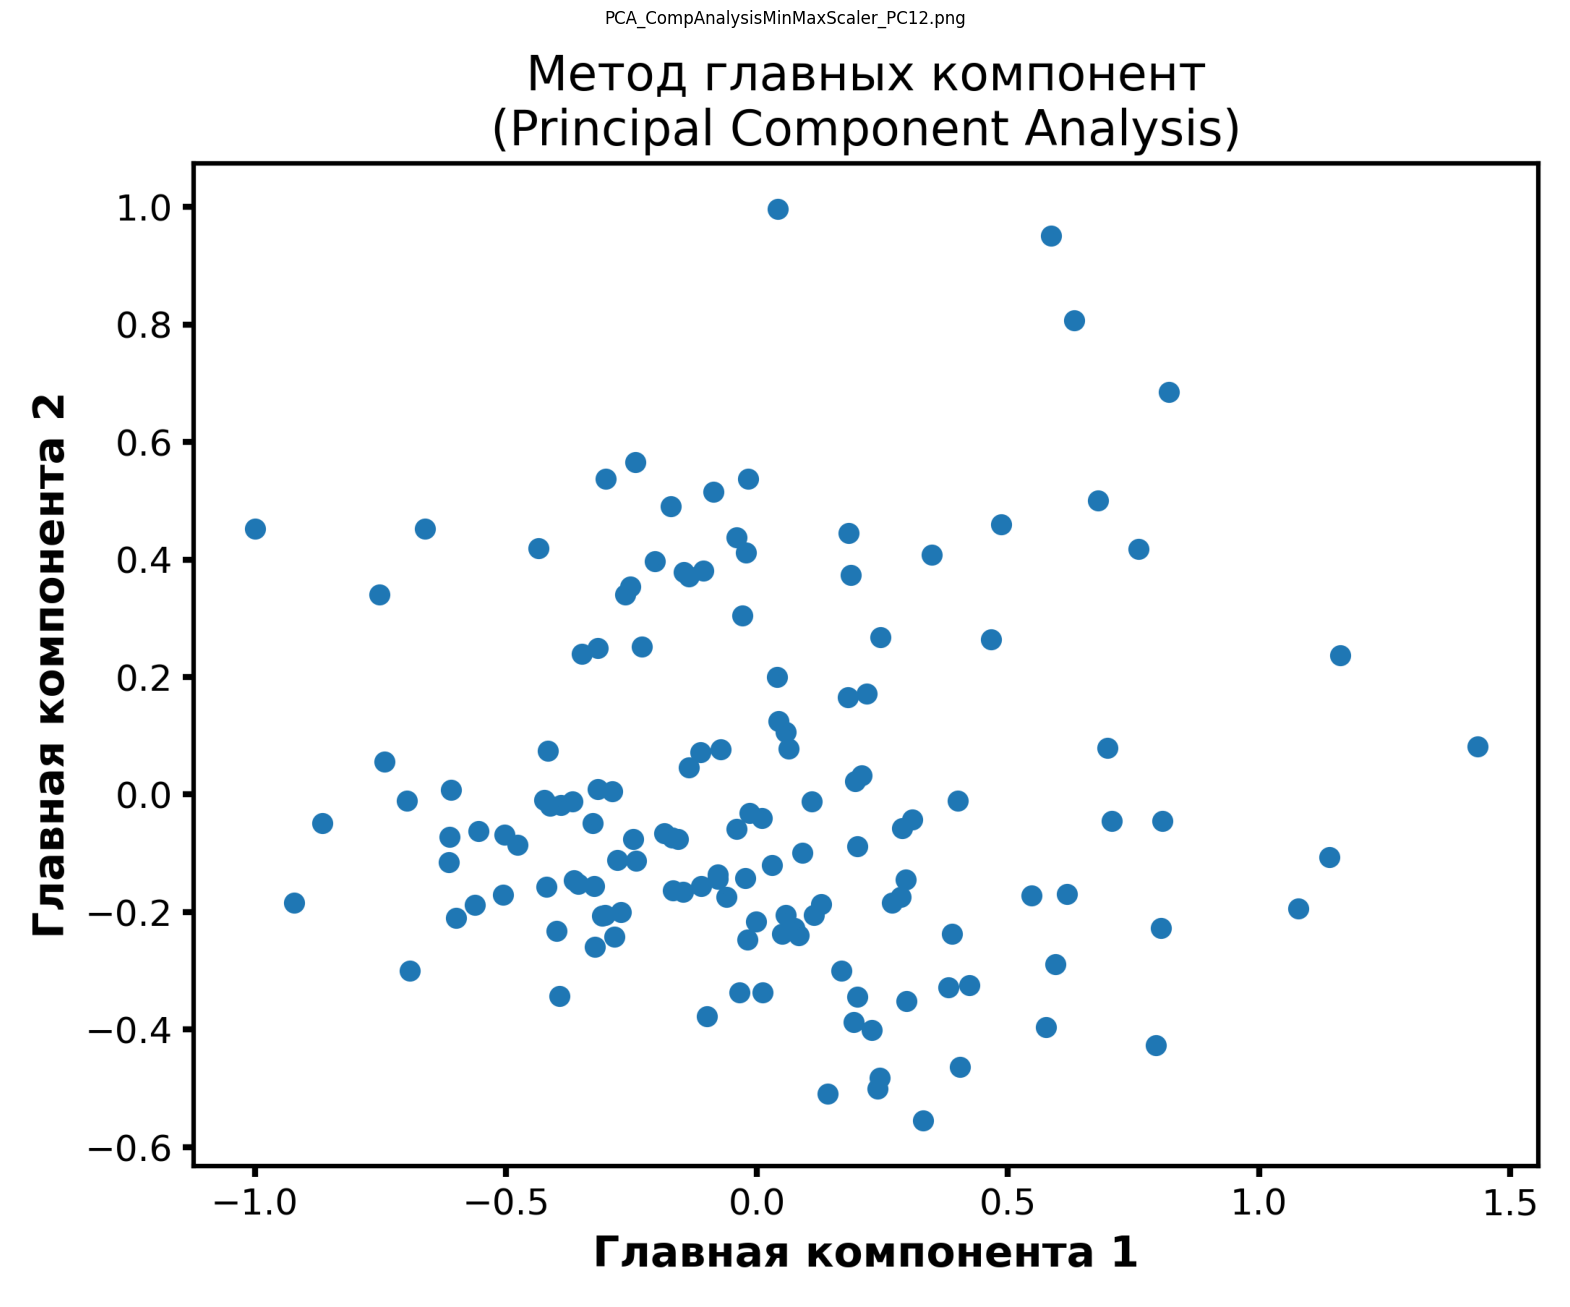

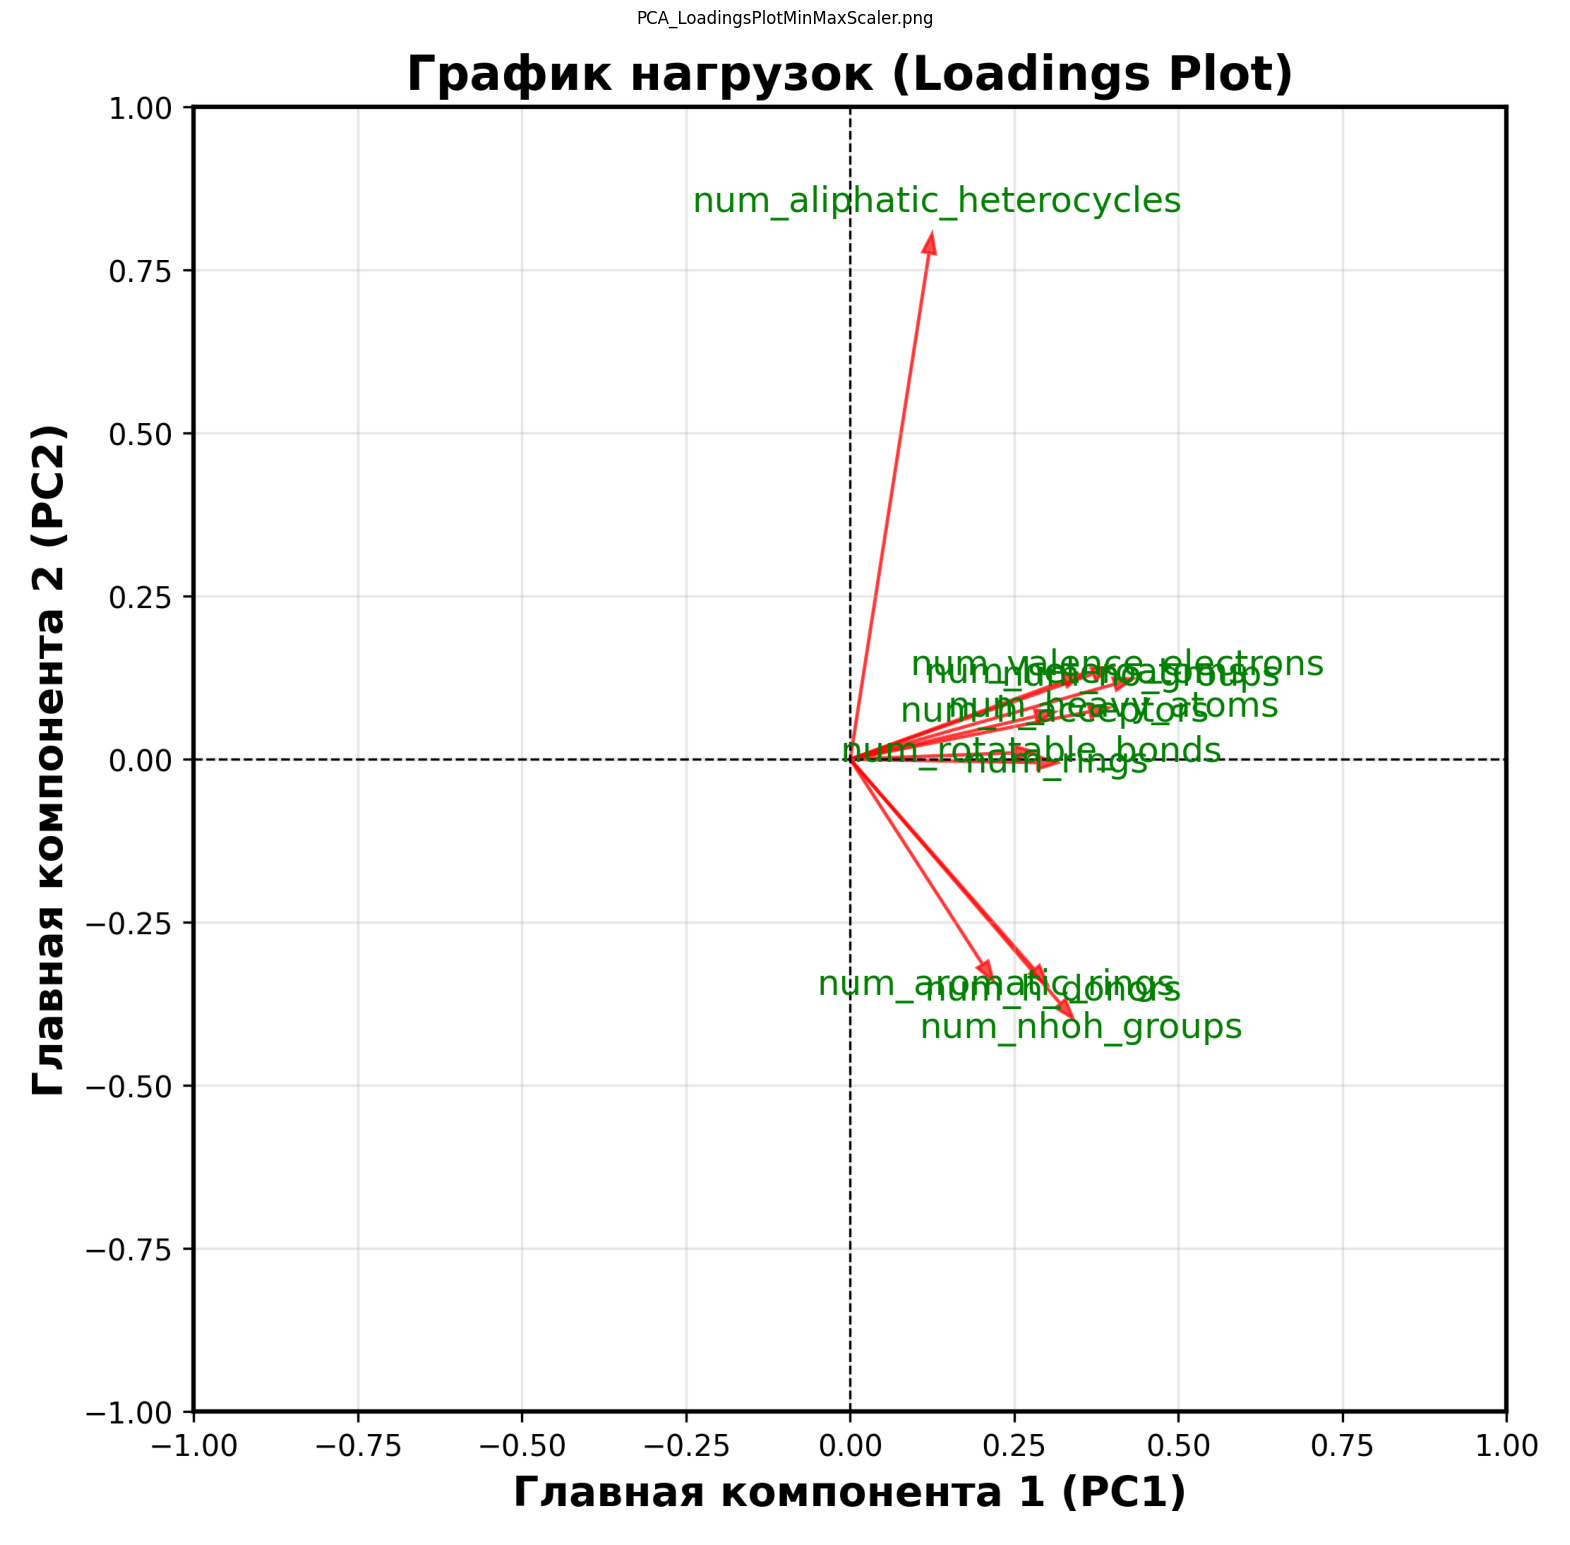

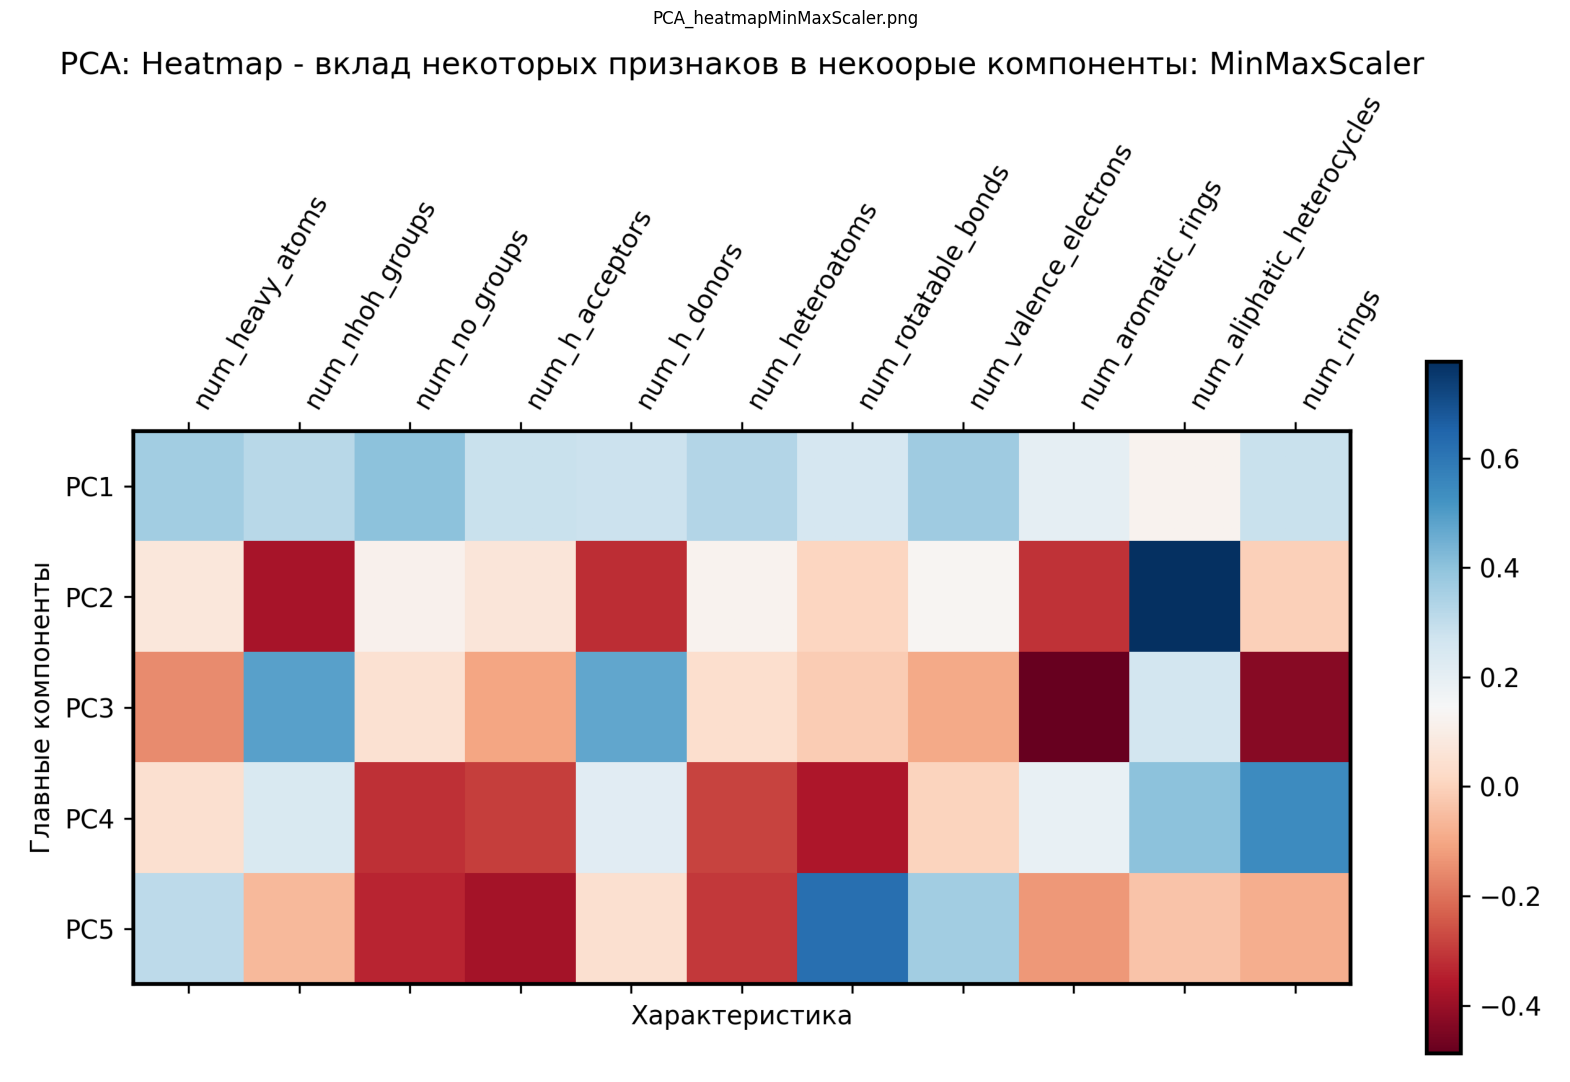

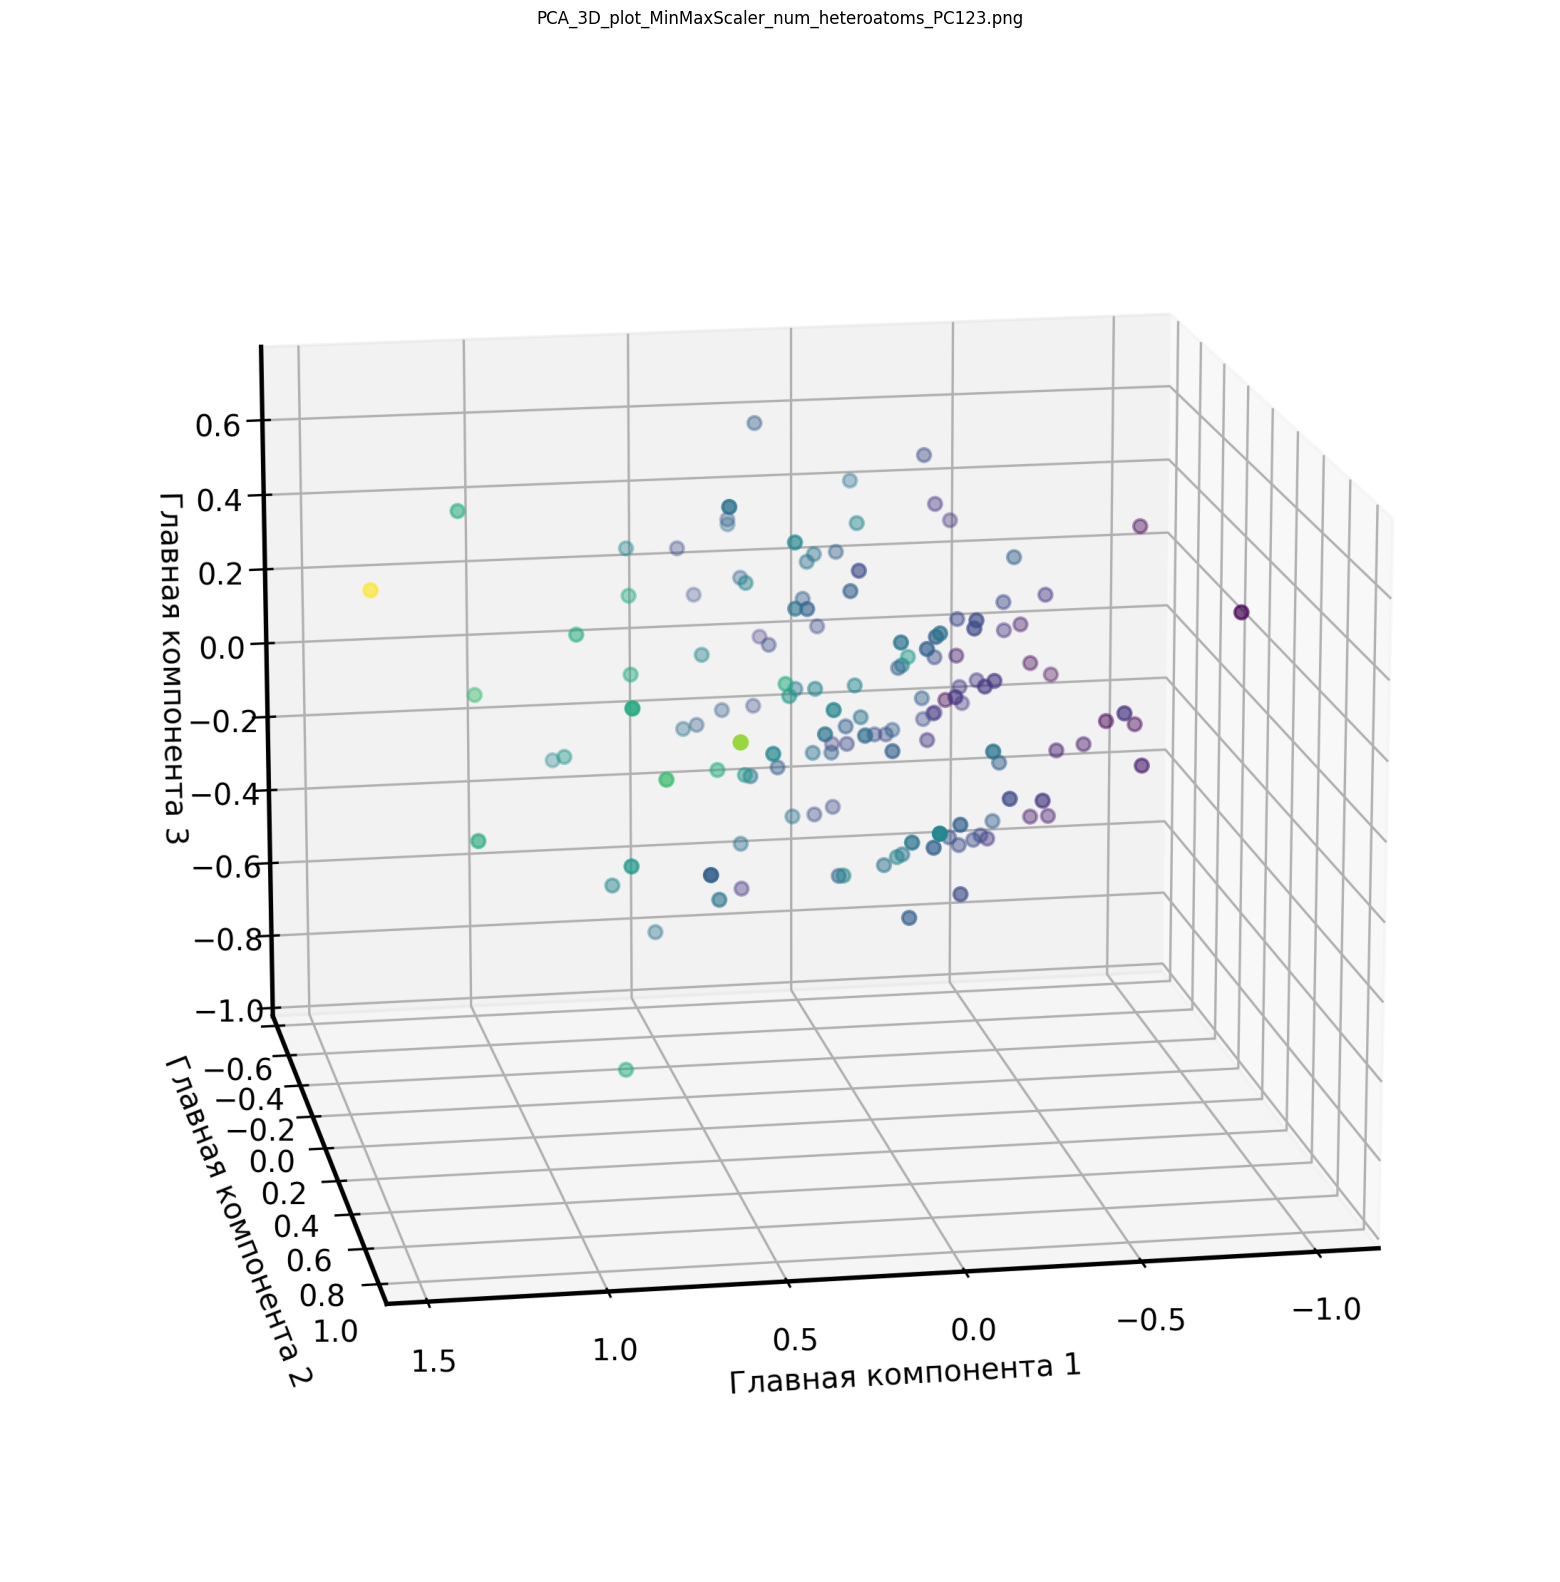

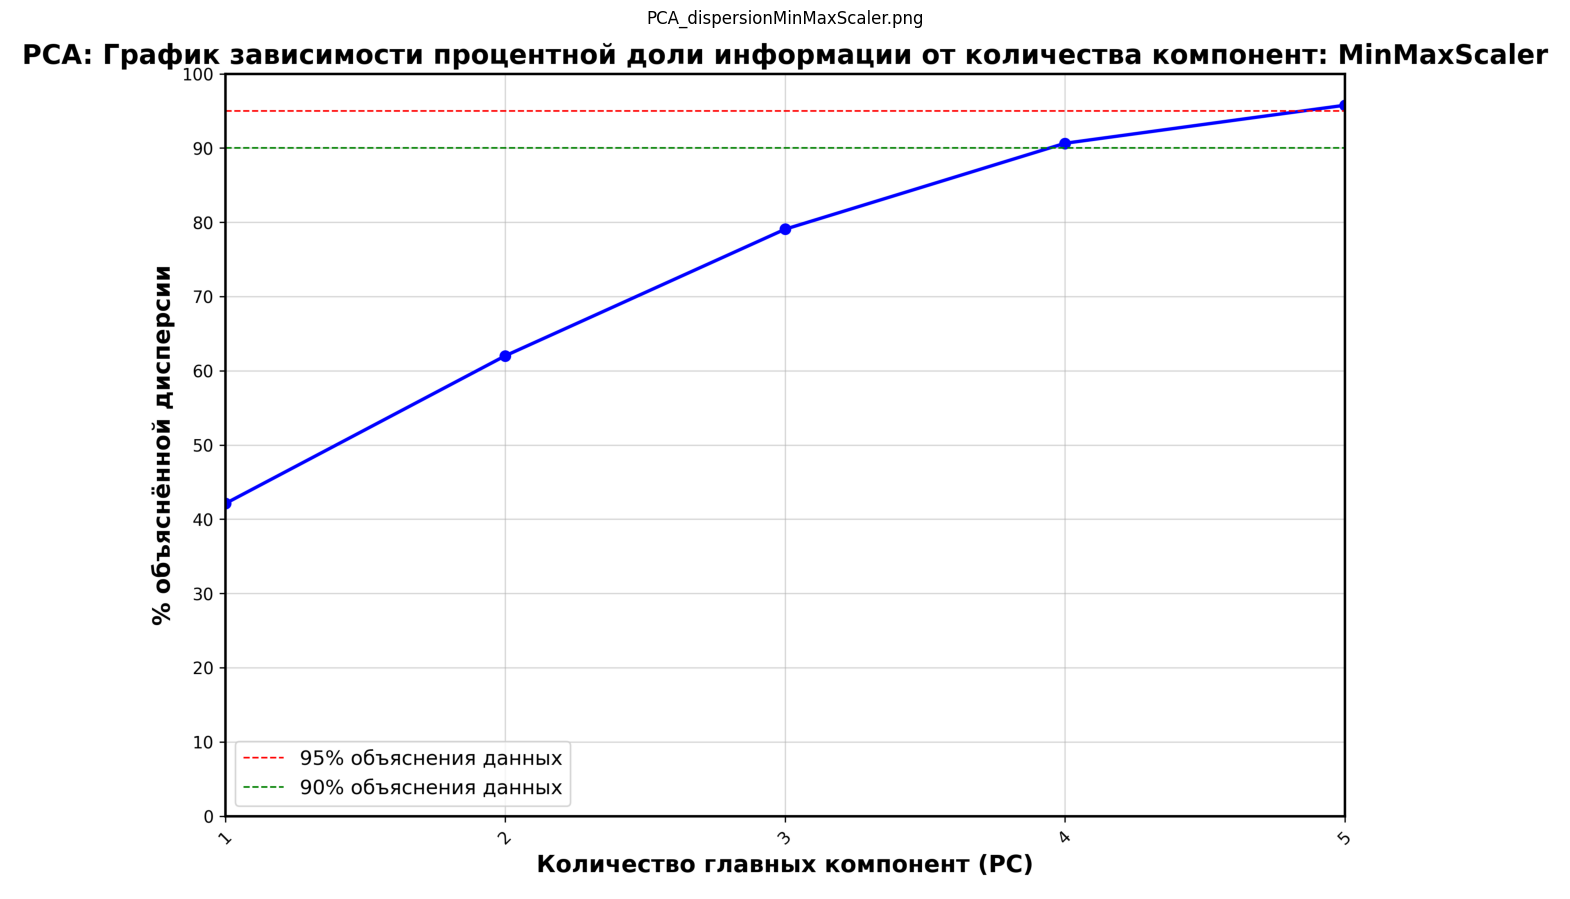

In [11]:
for filename in os.listdir(test_plots):
    if "MinMaxScaler" in filename:
        img = mpimg.imread(os.path.join(test_plots, filename))
        plt.figure(figsize=(20,20)) 
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)
        plt.show()